# Итоговая работа по Языкам программирования

## Постановка задачи

**Бизнес-задача от кинокомпании "StarVision Films"**

**Название проекта:**
Разработка прогнозной модели окупаемости фильмов на основе ключевых параметров.

**Цель:**
Создать модель, которая позволит предсказывать финансовую успешность кинопроектов на этапе планирования, чтобы минимизировать риски и оптимизировать инвестиции в производство фильмов.


Описание данных

In [1]:
import numpy as np
import pandas as pd

df_movies = pd.read_csv("dataset/movies_metadata.csv")
df_cast = pd.read_csv("dataset/credits.csv")

print(df_movies.columns)

print(df_cast)

C:\Users\user\AppData\Local\Temp\ipykernel_19168\3673338131.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv("dataset/movies_metadata.csv")


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
                                                    cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr... 

## Просмотр данных

In [2]:
df_cast['cast'].iloc[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [3]:
df_cast['crew'].iloc[0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [4]:
df_movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [5]:
print("Пропуски в df_movies:")
print(df_movies.isna().sum())

Пропуски в df_movies:
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [6]:
# Фильтруем фильмы по бизнес-логике
df_movies = df_movies[
    (df_movies['release_year'] >= 2000) &
    (df_movies['us_supported']) &
    (df_movies['budget'] > 0) &
    (df_movies['revenue'] > 0)
].copy()

KeyError: 'release_year'

In [23]:
# Только количество уникальных значений
print("\nКоличество уникальных значений по колонкам:")
print(df_movies.nunique())

# Полная статистика (топ-5 частых значений для каждой колонки)
for column in df_movies.columns:
    print(f"\nКолонка: {column}")
    print(f"Уникальных значений: {df_movies[column].nunique()}")
    print("Топ-5 частых значений:")
    print(df_movies[column].value_counts().head())


Количество уникальных значений по колонкам:


TypeError: unhashable type: 'list'

Удаляем ненужные и неинформативные столбцы

In [22]:
df_movies = df_movies[df_movies['status'] == 'Released']
df_movies = df_movies[df_movies['adult'] == 'False']
df_movies = df_movies.drop(columns=['video', 'tagline', 'status',
                                    'poster_path', 'overview', 'original_title',
                                    'spoken_languages', 'imdb_id', 'homepage', 
                                    'belongs_to_collection', 'adult', 'production_companies'])


### Проверка пропусков

In [11]:
print("Пропуски в df_movies:")
print(df_movies.isna().sum())

Пропуски в df_movies:
budget                    0
genres                    0
id                        0
original_language        10
popularity                0
production_countries      0
release_date             78
revenue                   0
runtime                 251
title                     0
vote_average              0
vote_count                0
dtype: int64


In [9]:
df_movies[['title', 'production_countries', 'revenue']][df_movies['release_date'].isna()].sort_values(by='revenue', ascending=False)

,title,production_countries,revenue
3460,"Jails, Hospitals & Hip-Hop",[],10.0
711,War Stories Our Mother Never Told Us,[],0.0
734,Vermont Is for Lovers,[],0.0
3628,Boricua's Bond,[],0.0
5879,Divine Intervention,[],0.0
...,...,...,...
45410,Aprel,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0
45461,Subdue,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0
19729,NaN,NaN,NaN
29502,NaN,NaN,NaN


In [11]:
df_movies[['title', 'production_countries', 'revenue']][df_movies['runtime'].isna()].sort_values(by='revenue', ascending=False).head(10)

,title,production_countries,revenue
25937,"Pancho, el perro millonario","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",2483130.0
39496,La caliente niña Julietta,"[{'iso_3166_1': 'ES', 'name': 'Spain'}]",591696.0
35216,Nunca en horas de clase,"[{'iso_3166_1': 'ES', 'name': 'Spain'}]",495861.0
635,Happy Weekend,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",65335.0
43392,Королёв,[],31000.0
40378,Miesten välisiä keskusteluja,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",3.0
43941,Кентервильское привидение,[],0.0
43949,Семь кабинок,[],0.0
43963,Survivor,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0
43985,Совершенно серьезно,[],0.0


In [12]:
df_movies[['title', 'production_countries', 'revenue']][df_movies['original_language'].isna()].sort_values(by='revenue', ascending=False).head(10)

,title,production_countries,revenue
19574,Shadowing the Third Man,"[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...",0.0
21602,Unfinished Sky,"[{'iso_3166_1': 'AU', 'name': 'Australia'}]",0.0
22832,13 Fighting Men,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0
32141,Lambchops,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0
37407,Prince Bayaya,"[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'}]",0.0
41047,Song of Lahore,[],0.0
41872,Annabelle Serpentine Dance,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0
44057,Lettre d'une inconnue,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0
44410,Yarn,[],0.0
44576,WiNWiN,"[{'iso_3166_1': 'AT', 'name': 'Austria'}]",0.0


**ВЫВОДЫ:** 
Как мы увидели все фильмы с пропусками, либо ничего не заработали, либо сняты не при помощи США. 

Поэтому можно удалить эти пропуски.

In [13]:
df_movies = df_movies.dropna(subset=['title', 'release_date', 'runtime', 'budget', 'original_language', 'revenue'])

### Оставляем только фильмы на английском языке и сделаные при помощи США

In [14]:
import ast
# Безопасное преобразование строки в список
def safe_eval(x):
    try:
        return ast.literal_eval(x) if pd.notna(x) else []
    except (ValueError, SyntaxError):
        return []

# Применяем функцию ко всей колонке
df_movies['production_countries'] = df_movies['production_countries'].apply(safe_eval)

In [15]:
df_movies = df_movies[df_movies['production_countries'].apply(
    lambda x: any(
        isinstance(country, dict) and country.get('iso_3166_1') == 'US'
        for country in x
    )
)]

In [16]:
# Оставляем только фильмы на английском языке
df_movies = df_movies[df_movies['original_language'] == 'en']

### Преобразование даты

In [17]:
# Преобразуем в datetime
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# Создаем новые столбцы
df_movies['release_year'] = df_movies['release_date'].dt.year
df_movies['release_week'] = df_movies['release_date'].dt.isocalendar().week

In [19]:
df_movies['vote_count'] = df_movies['vote_count'].astype('int64')
df_movies['budget'] = df_movies['budget'].astype('int64')
df_movies['revenue'] = df_movies['revenue'].astype('int64')
df_movies['popularity'] = df_movies['popularity'].astype('float64')

In [29]:
# Расчёт прибыли
df_movies['profit'] = df_movies['revenue'] - df_movies['budget']

In [20]:
# Фильтруем фильмы по бизнес-логике
df_movies = df_movies[
    (df_movies['release_year'] >= 2000) &
    (df_movies['budget'] > 0) &
    (df_movies['revenue'] > 0)
].copy()

In [24]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2605 entries, 3060 to 45167
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                2605 non-null   int64         
 1   genres                2605 non-null   object        
 2   id                    2605 non-null   object        
 3   original_language     2605 non-null   object        
 4   popularity            2605 non-null   float64       
 5   production_countries  2605 non-null   object        
 6   release_date          2605 non-null   datetime64[ns]
 7   revenue               2605 non-null   int64         
 8   runtime               2605 non-null   float64       
 9   title                 2605 non-null   object        
 10  vote_average          2605 non-null   float64       
 11  vote_count            2605 non-null   int64         
 12  release_year          2605 non-null   int32         
 13  release_week       

### Преобразование жанров

In [25]:
df_movies['genres'] = df_movies['genres'].apply(
    lambda x: [genre['name'] for genre in eval(x)] if pd.notna(x) else []
)
df_movies['genres'].head()

3060                                 [Comedy]
3073      [Horror, Science Fiction, Thriller]
3155                        [Horror, Mystery]
3158      [Action, Comedy, Romance, Thriller]
3167    [Drama, Adventure, Romance, Thriller]
Name: genres, dtype: object

In [26]:
# Проверка пустых списков в genres
df_movies['genres'].value_counts().head(15)

genres
[Comedy]                     188
[Drama]                      179
[Drama, Romance]              76
[Comedy, Romance]             74
[Comedy, Drama]               65
[Comedy, Drama, Romance]      64
[Horror, Thriller]            60
[Drama, Thriller]             42
[Horror]                      34
[Drama, Comedy]               26
[Crime, Drama, Thriller]      25
[Action, Thriller]            23
[Action, Crime, Thriller]     23
[Comedy, Family]              22
[Action, Comedy]              21
Name: count, dtype: int64

In [27]:
# Разбиваем списки на отдельные строки
exploded_genres = df_movies['genres'].explode()

# Считаем частоту
genre_counts = exploded_genres.value_counts()
print(genre_counts)

genres
Drama              1170
Comedy              938
Thriller            778
Action              698
Adventure           496
Romance             443
Crime               407
Family              312
Science Fiction     310
Horror              281
Fantasy             260
Mystery             220
Animation           169
Music                87
History              73
War                  68
Documentary          33
Western              28
Foreign               1
Name: count, dtype: int64


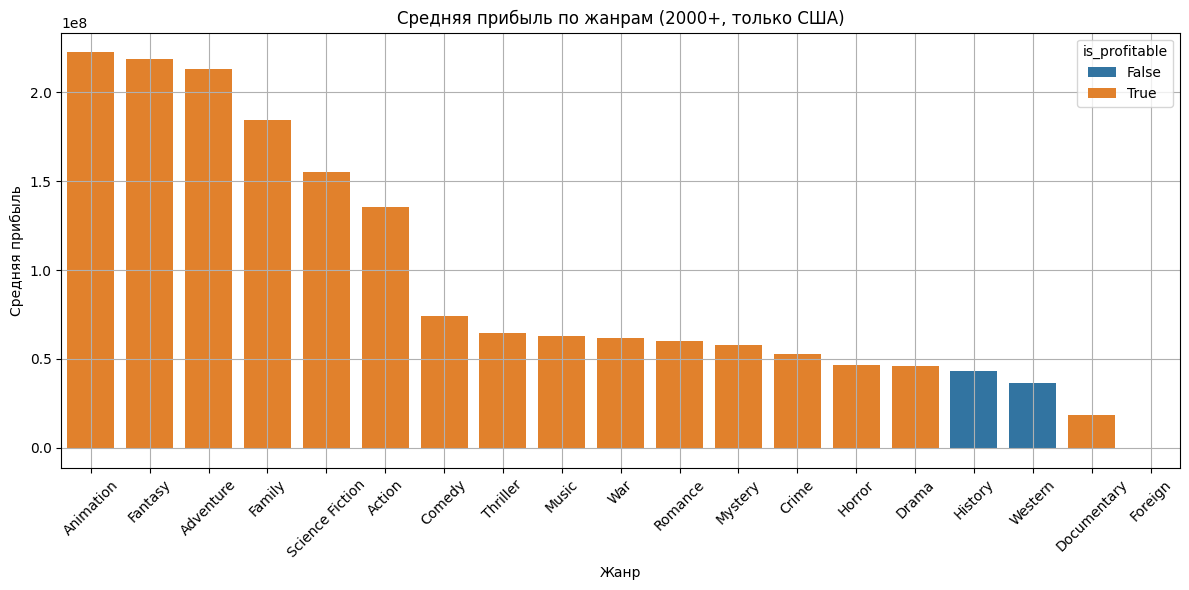

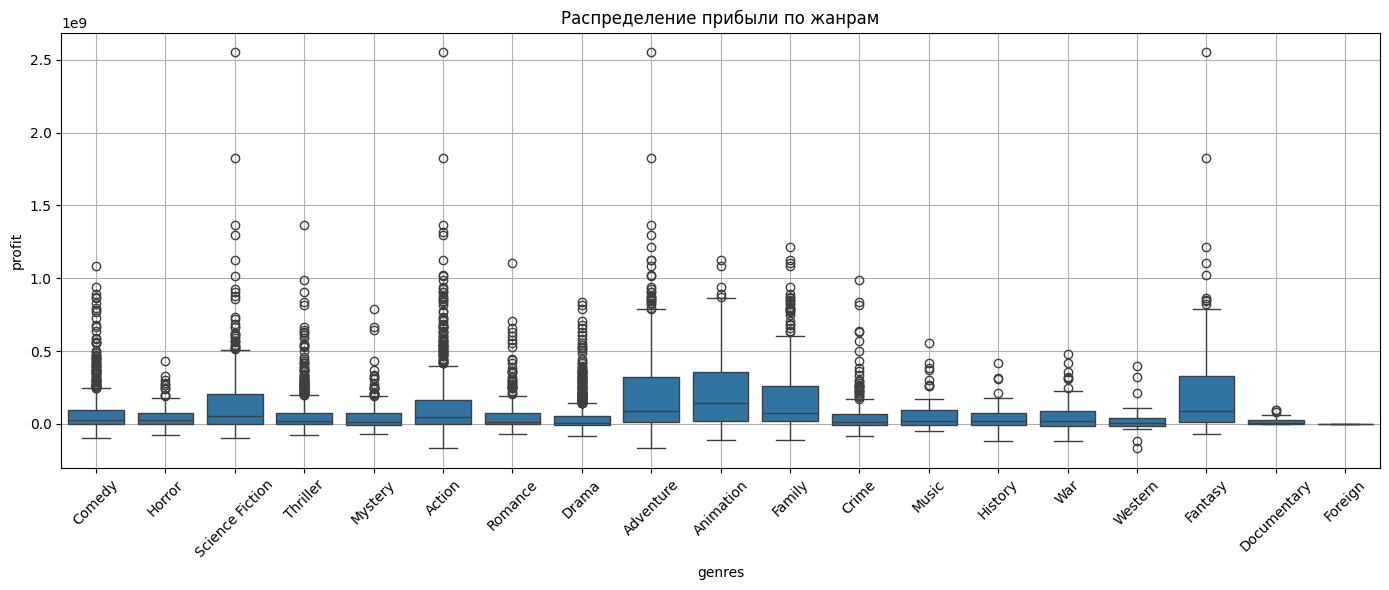

In [35]:
# Взрыв жанров
exploded_genres = df_movies.explode('genres')

# Группировка по жанрам
genre_stats = exploded_genres.groupby('genres').agg(
    count=('profit', 'count'),
    mean_profit=('profit', 'mean'),
    median_profit=('profit', 'median'),
    mean_budget=('budget', 'mean'),
    mean_revenue=('revenue', 'mean'),
    median_budget=('budget', 'median'),
    median_revenue=('revenue', 'median')
).sort_values('mean_profit', ascending=False)

genre_stats['is_profitable'] = genre_stats['mean_revenue'] / genre_stats['mean_budget'] > 2

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats.reset_index(), x='genres', y='mean_profit', hue='is_profitable', dodge=False)
plt.xticks(rotation=45)
plt.title('Средняя прибыль по жанрам (2000+, только США)')
plt.xlabel('Жанр')
plt.ylabel('Средняя прибыль')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=exploded_genres[exploded_genres['genres'].isin(genre_stats.index)], x='genres', y='profit')
plt.xticks(rotation=45)
plt.title('Распределение прибыли по жанрам')
plt.tight_layout()
plt.grid(True)
plt.show()

# Список прибыльных жанров
profitable_genres = genre_stats[genre_stats['is_profitable']].index.tolist()

# Оставляем только прибыльные жанры
filtered_profitable = df_movies[
    df_movies['genres'].apply(lambda lst: any(g in profitable_genres for g in lst))
]

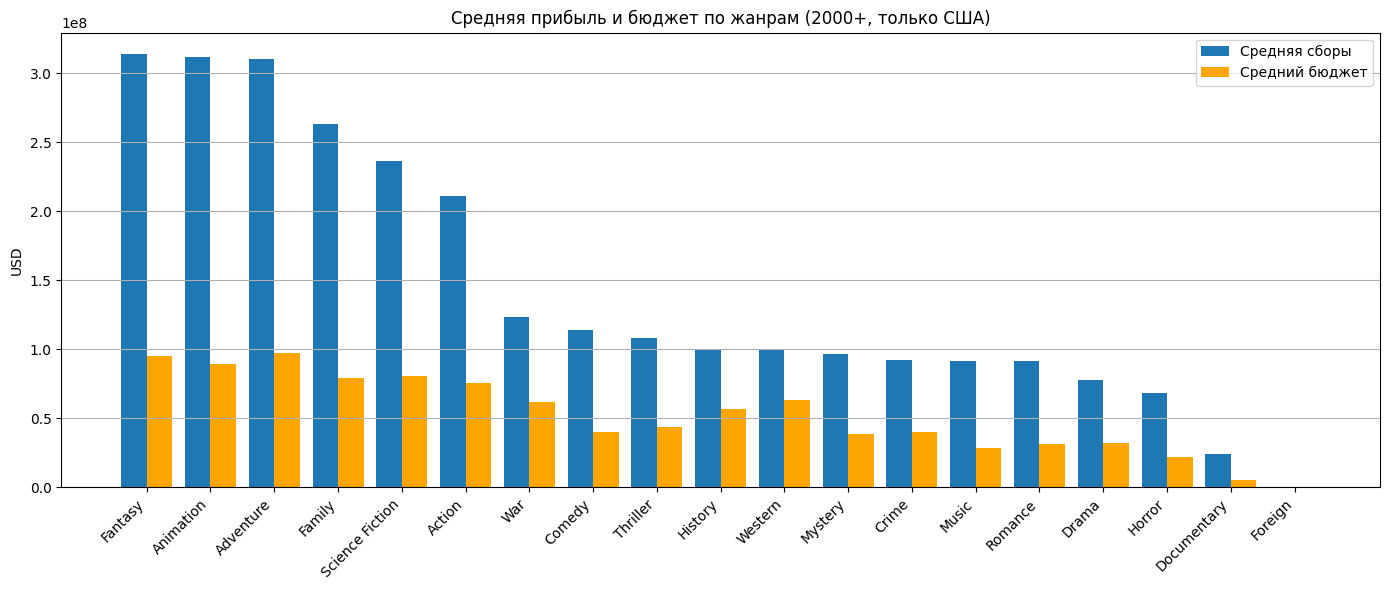

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Подготовка данных
plot_df = genre_stats.reset_index().sort_values('mean_revenue', ascending=False)
x = np.arange(len(plot_df))  # позиции жанров на оси X
width = 0.4  # ширина одного столбца

fig, ax = plt.subplots(figsize=(14, 6))

# Столбец: прибыль
profit_bars = ax.bar(x - width/2, plot_df['mean_revenue'], width=width, label='Средняя сборы')

# Столбец: бюджет
budget_bars = ax.bar(x + width/2, plot_df['mean_budget'], width=width, label='Средний бюджет', color='orange')

# Настройка осей
ax.set_xticks(x)
ax.set_xticklabels(plot_df['genres'], rotation=45, ha='right')
ax.set_ylabel('USD')
ax.set_title('Средняя прибыль и бюджет по жанрам (2000+, только США)')
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


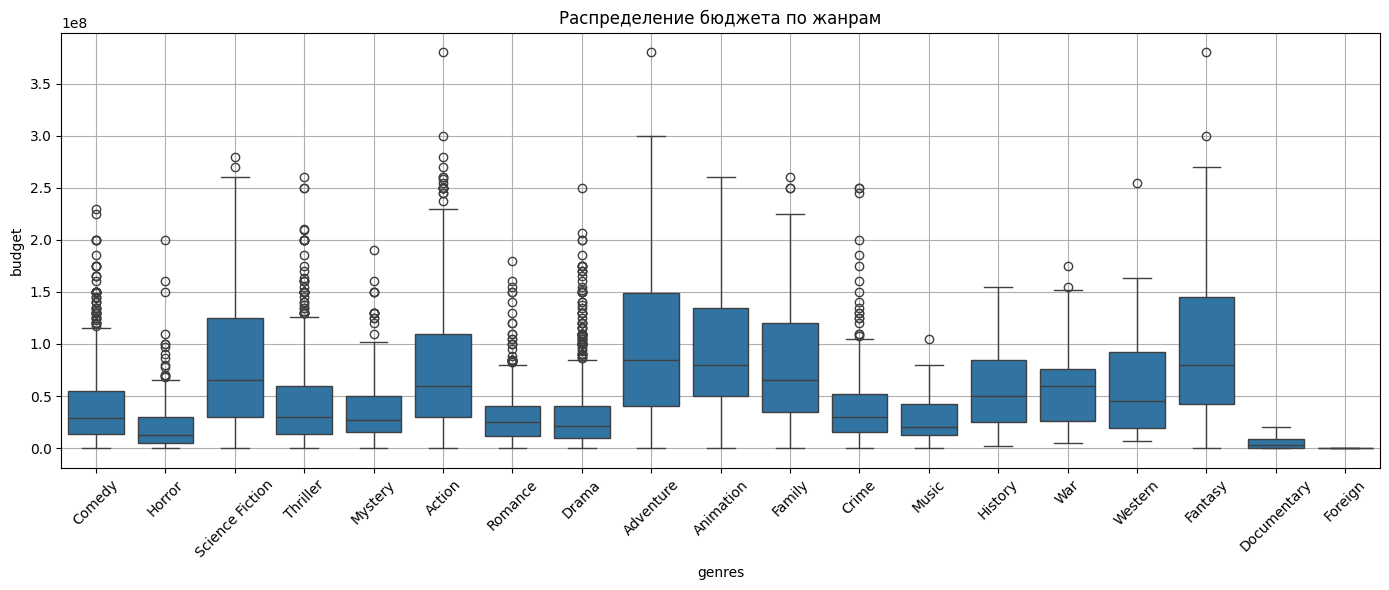

In [37]:
# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=exploded_genres[exploded_genres['genres'].isin(genre_stats.index)], x='genres', y='budget')
plt.xticks(rotation=45)
plt.title('Распределение бюджета по жанрам')
plt.tight_layout()
plt.grid(True)
plt.show()

6772


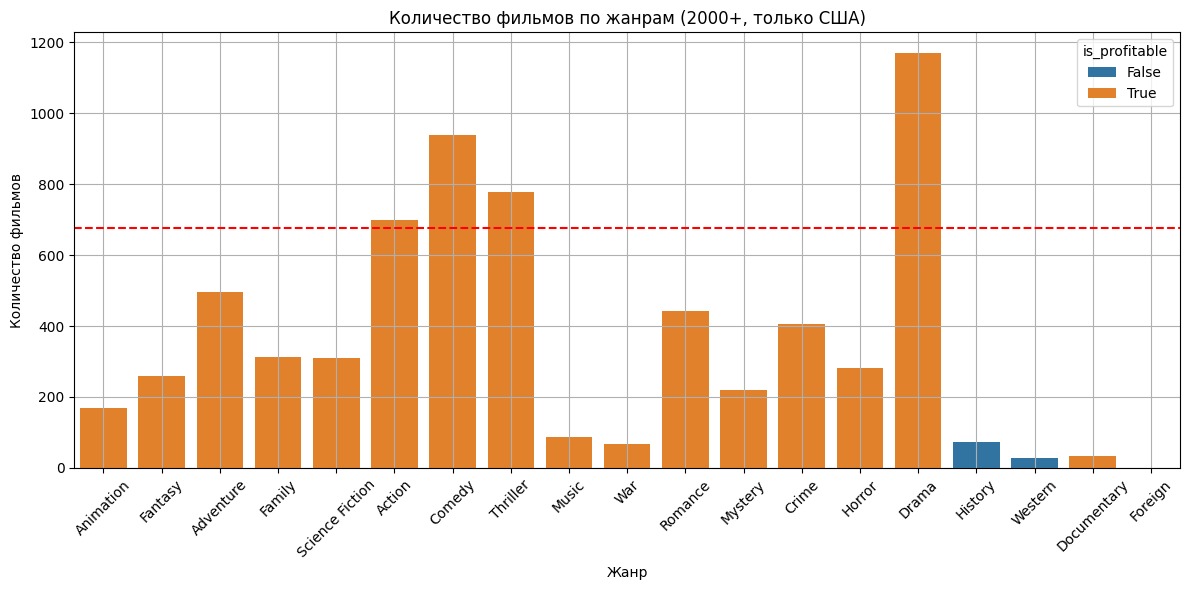

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

print(sum(genre_stats['count']))
threshold_10pct = sum(genre_stats['count']) * 0.1
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats.reset_index(), x='genres', y='count', hue='is_profitable', dodge=False)
plt.axhline(threshold_10pct, color='red', linestyle='--', label='10% от общего')
plt.xticks(rotation=45)
plt.title('Количество фильмов по жанрам (2000+, только США)')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.tight_layout()
plt.show()

Объединяем жанры от Animation до Action в высокоприбыльные жанры, а от Music до Horror слабоприбыльные жанры. Добавляем is_comedy и is_thriller, is_drama. от history до foreign убирем.

In [110]:
# Классы жанров
high_profit_genres = [
    'Animation', 'Fantasy', 'Adventure', 'Family', 'Science Fiction', 'Action'
]

low_profit_genres = [
    'Romance', 'Crime', 'Music', 'War', 'Mystery', 'Horror'
]

exclude_genres = [
    'History', 'Western', 'Documentary', 'Foreign'
]

# Удаляем фильмы с только исключёнными жанрами
def keep_film(genres):
    genres_set = set(genres)
    return not genres_set.issubset(set(exclude_genres))

df_movies = df_movies[df_movies['genres'].apply(keep_film)].copy()

In [111]:
# Создание индикаторов жанров, которые нам важны
genres_to_check = ['Comedy', 'Thriller', 'Drama']

for genre in genres_to_check:
    df_movies[f'is_{genre}'] = df_movies['genres'].apply(
        lambda x: genre in x
    )

In [112]:
def classify_profit_genre(genres):
    for g in genres:
        if g in high_profit_genres:
            return 'high'
        elif g in low_profit_genres:
            return 'low'
    return 'unknown'

df_movies['genre_profit_class'] = df_movies['genres'].apply(classify_profit_genre)
df_movies['is_high_genre_profit'] = df_movies['genre_profit_class'] == 'high'
df_movies['is_low_genre_profit'] = df_movies['genre_profit_class'] == 'low'

In [113]:
df_movies['genre_profit_class'].value_counts()

genre_profit_class
high       1087
low         929
unknown     565
Name: count, dtype: int64

In [114]:
print("Пропуски в df_movies:")
print(df_movies.isna().sum())

Пропуски в df_movies:
budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
release_year            0
release_week            0
profit                  0
A_first                 2
B_first                 2
A_second                2
B_second                2
is_summer               0
is_Xmas                 0
years_since_release     0
is_Comedy               0
is_Thriller             0
is_Drama                0
genre_profit_class      0
is_high_genre_profit    0
is_low_genre_profit     0
dtype: int64


### Преобразуем production_countries

In [21]:
import ast
# Безопасное преобразование строки в список
def safe_eval(x):
    try:
        return ast.literal_eval(x) if pd.notna(x) else []
    except (ValueError, SyntaxError):
        return []

# Применяем функцию ко всей колонке
df_movies['production_countries'] = df_movies['production_countries'].apply(safe_eval)

In [22]:
us_count = 0
for countries in df_movies['production_countries']:
    for country in countries:
        if isinstance(country, dict) and country.get('iso_3166_1') == 'US':
            us_count += 1
            break  # Прерываем внутренний цикл после первого вхождения США

print(f"Фильмов с участием США в производстве: {us_count}")

Фильмов с участием США в производстве: 21015


In [23]:
df_movies['us_supported'] = df_movies['production_countries'].apply(
    lambda x: any(
        isinstance(country, dict) and country.get('iso_3166_1') == 'US'
        for country in x
    )
)

In [ ]:
# Фильтруем фильмы по бизнес-логике
df_movies = df_movies[
    (df_movies['release_year'] >= 1990) &
    (df_movies['us_supported']) &
    (df_movies['budget'] > 0) &
    (df_movies['revenue'] > 0)
].copy()

### Удаление na значений и нулевых

In [29]:
df_movies['vote_count'] = df_movies['vote_count'].astype('Int64')
df_movies['budget'] = df_movies['budget'].astype('Int64')
df_movies['revenue'] = df_movies['revenue'].astype('Int64')
df_movies['popularity'] = df_movies['popularity'].astype('Float64')

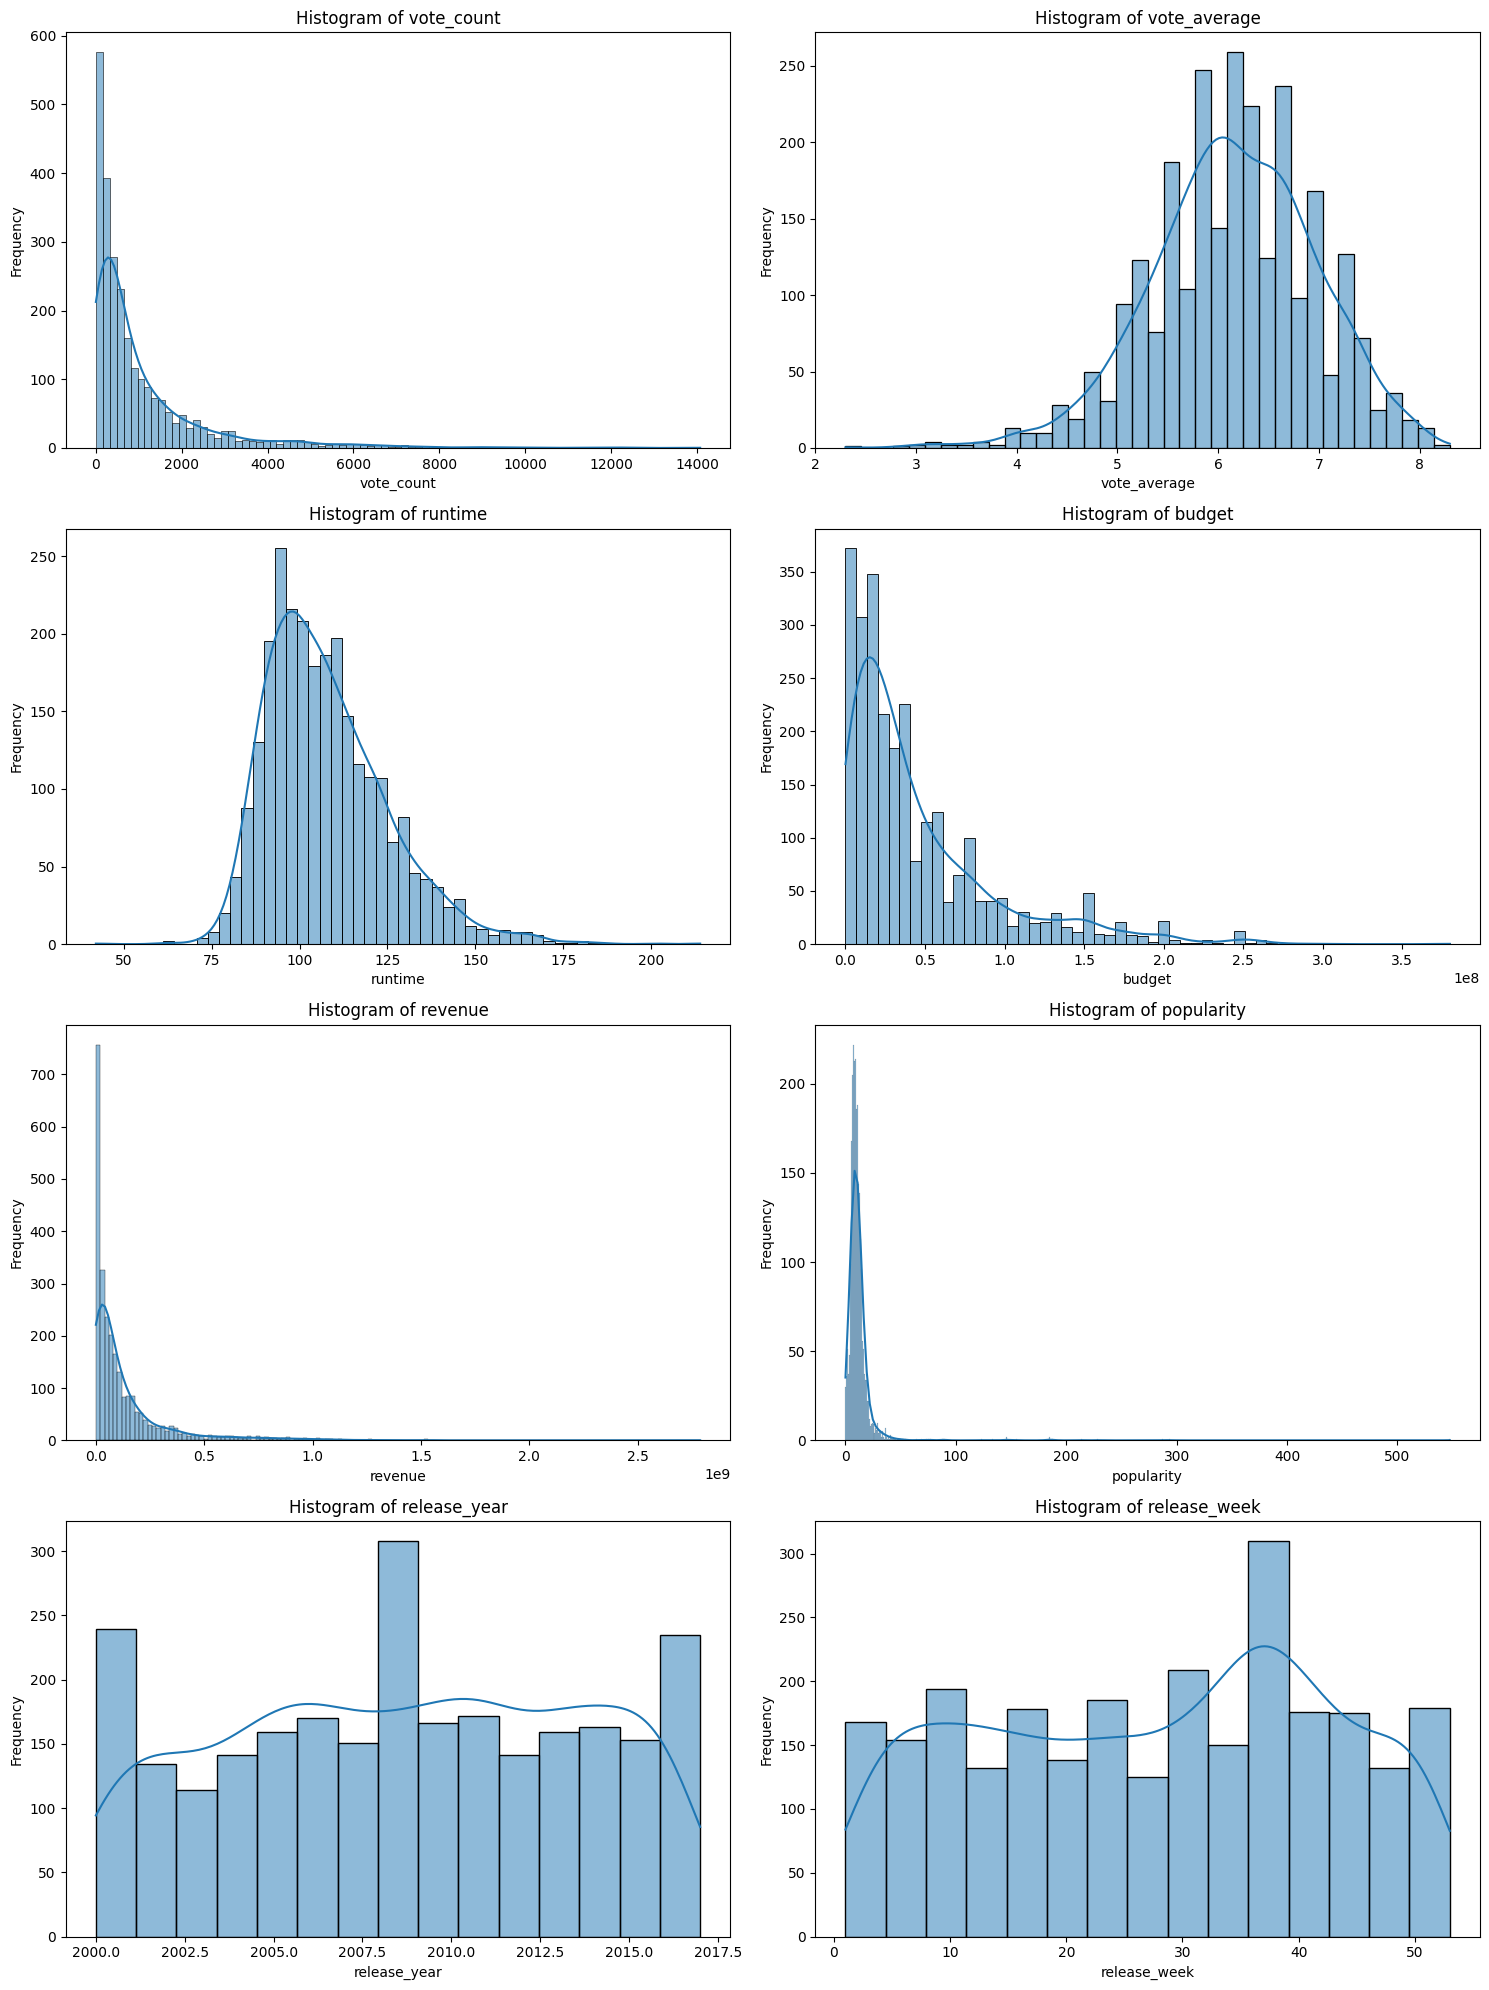

In [38]:
numeric_column = ['vote_count', 'vote_average', 'runtime', 'budget', 'revenue', 'popularity', 'release_year', 'release_week']

import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру с подзаголовками 4x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Перебираем столбцы и создаем гистограммы
for i, column in enumerate(numeric_column):
    # Определяем позицию подзаголовка
    row, col = divmod(i, 2)
    # Создаем гистограмму
    sns.histplot(data=df_movies, x=column, kde=True, ax=axes[row, col])
    # Добавляем заголовок и метки
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Настраиваем расстояние между подзаголовками
plt.tight_layout()
plt.show()

In [163]:
mask_is_null = ((df_movies['revenue'] == 0) | (df_movies['runtime'] == 0) |
                (df_movies['budget'] == 0) | (df_movies['vote_count'] == 0) | (df_movies['vote_average'] == 0))

df_movies = df_movies[~mask_is_null]

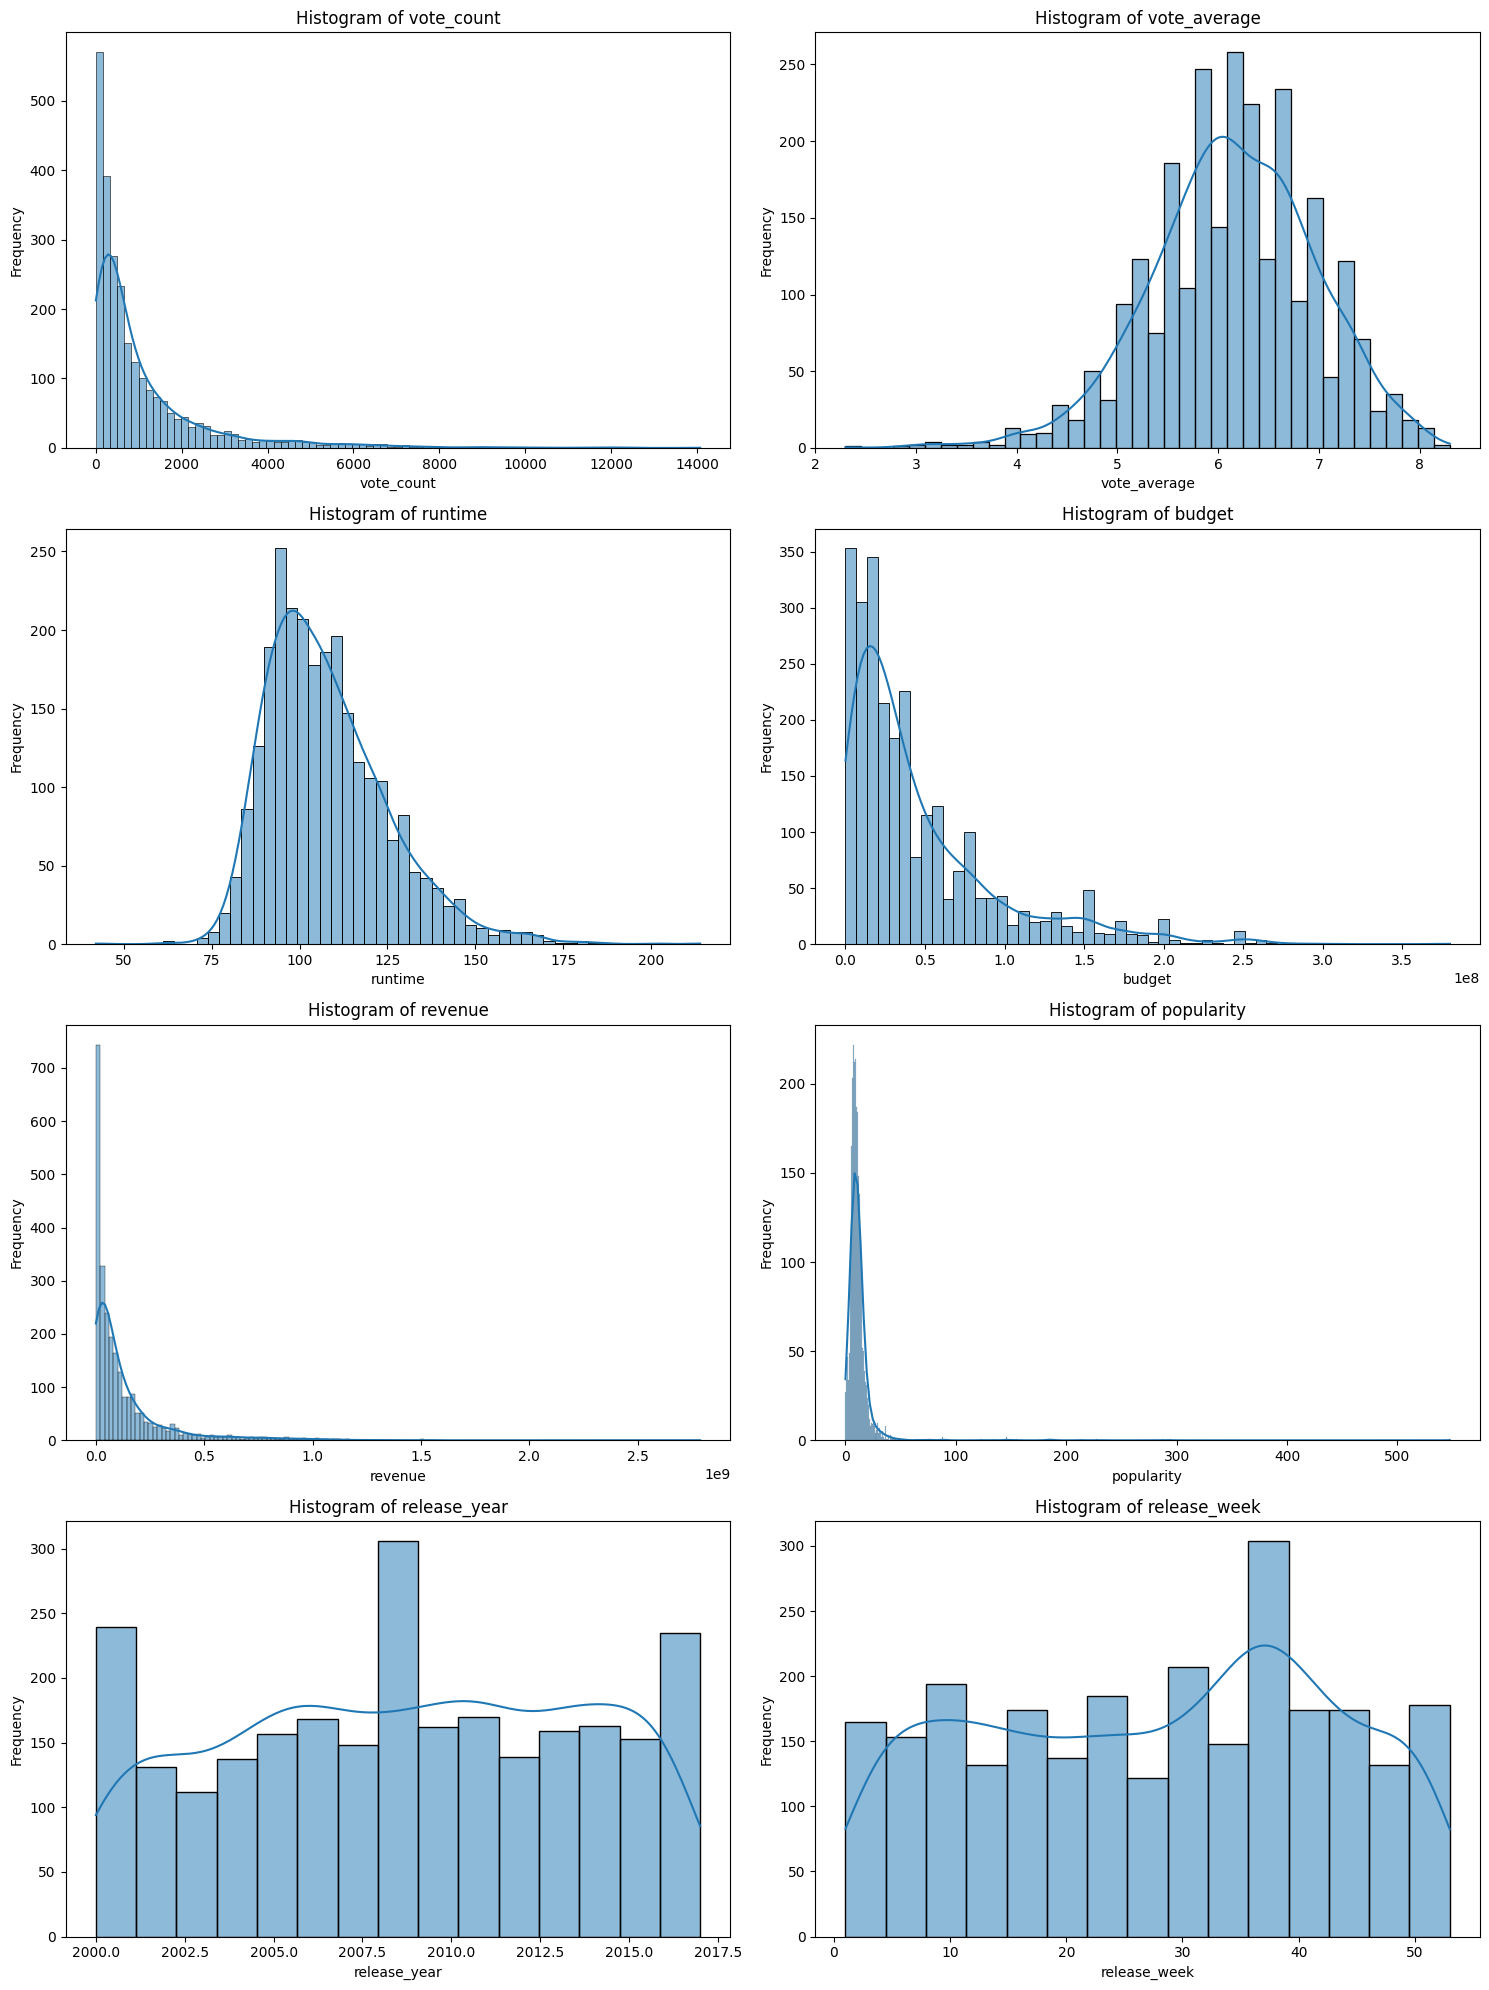

In [164]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Перебираем столбцы и создаем гистограммы
for i, column in enumerate(numeric_column):
    # Определяем позицию подзаголовка
    row, col = divmod(i, 2)
    # Создаем гистограмму
    sns.histplot(data=df_movies, x=column, kde=True, ax=axes[row, col])
    # Добавляем заголовок и метки
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Настраиваем расстояние между подзаголовками
plt.tight_layout()
plt.show()

## Кластеризация актеров

### Преобразуем cast и получает таблицу актеров с фильмами

In [39]:
import ast
from collections import defaultdict
# Если cast ещё не преобразован в списки
df_cast['cast'] = df_cast['cast'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Заменим NaN на пустые списки
df_cast['cast'] = df_cast['cast'].fillna("").apply(lambda x: x if isinstance(x, list) else [])

In [40]:
df_cast['cast'].head(10)

0    [{'cast_id': 14, 'character': 'Woody (voice)',...
1    [{'cast_id': 1, 'character': 'Alan Parrish', '...
2    [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3    [{'cast_id': 1, 'character': 'Savannah 'Vannah...
4    [{'cast_id': 1, 'character': 'George Banks', '...
5    [{'cast_id': 25, 'character': 'Lt. Vincent Han...
6    [{'cast_id': 1, 'character': 'Linus Larrabee',...
7    [{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...
8    [{'cast_id': 1, 'character': 'Darren Francis T...
9    [{'cast_id': 1, 'character': 'James Bond', 'cr...
Name: cast, dtype: object

In [41]:
# Список для хранения данных
actor_movie_data = []

# Проходим по каждой строке df_cast
for idx, row in df_cast.iterrows():
    movie_id = row['id']
    cast_list = row['cast']
    
    # Для каждого актёра в фильме
    for actor in cast_list:
        # Проверяем, что это словарь (на случай некорректных данных)
        if isinstance(actor, dict):
            actor_movie_data.append({
                'movie_id': movie_id,
                'actor_id': actor.get('id'),
                'actor_name': actor.get('name'),
                'character': actor.get('character'),
                'order': actor.get('order')
            })

# Создаем DataFrame
df_actor_movies = pd.DataFrame(actor_movie_data)

In [183]:
df_actor_movies.head()

,movie_id,actor_id,actor_name,character,order
0,862,31,Tom Hanks,Woody (voice),0
1,862,12898,Tim Allen,Buzz Lightyear (voice),1
2,862,7167,Don Rickles,Mr. Potato Head (voice),2
3,862,12899,Jim Varney,Slinky Dog (voice),3
4,862,12900,Wallace Shawn,Rex (voice),4


In [187]:
df_actor_movies[['actor_name', 'movie_id', 'order']].value_counts().head(10)

actor_name            movie_id  order
Eppu Salminen         141971    2        3
Jenni Banerjee        141971    5        3
Hannu-Pekka Björkman  141971    4        3
Ismo Kallio           141971    1        3
Irina Björklund       141971    3        3
Lena Meriläinen       141971    7        3
Mari Perankoski       141971    8        3
Mikko Leppilampi      141971    6        3
Petteri Summanen      141971    0        3
Risto Kaskilahti      141971    9        3
Name: count, dtype: int64

In [ ]:
df_actor_movies[['actor_name', 'movie_id', 'order']].drop_duplicates().shape[0]

In [186]:
df_movies[df_movies['id'] == 3506][['title', 'release_date', 'budget', 'revenue']]

,title,release_date,budget,revenue


In [43]:
df_movies['id'] = df_movies['id'].astype('int64')
df_movies['id'].isna().sum()

np.int64(0)

In [44]:
df_full_actor = pd.merge(
    df_actor_movies,
    df_movies,
    left_on='movie_id',
    right_on='id',
    how='inner'
)

# Удаляем дублирующую колонку
df_full_actor = df_full_actor.drop(columns=['id'])

In [45]:
df_full_actor.head()

,movie_id,actor_id,actor_name,character,order,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year,release_week,profit
0,10471,9778,Ice Cube,Craig Jones,0,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,98.0,Next Friday,6.5,145,2000,2,48827328
1,10471,51944,Mike Epps,Day-Day,1,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,98.0,Next Friday,6.5,145,2000,2,48827328
2,10471,57389,Justin Pierce,Roach,2,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,98.0,Next Friday,6.5,145,2000,2,48827328
3,10471,56902,John Witherspoon,Mr. Jones,3,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,98.0,Next Friday,6.5,145,2000,2,48827328
4,10471,65132,Don Curry,Uncle Elroy,4,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,98.0,Next Friday,6.5,145,2000,2,48827328


In [46]:
df_full_actor.isna().sum()

movie_id                0
actor_id                0
actor_name              0
character               0
order                   0
budget                  0
genres                  0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
release_year            0
release_week            0
profit                  0
dtype: int64

### Лучшие актеры

In [51]:
# Группировка по актёрам
actor_stats = df_full_actor.groupby('actor_name').agg(
    movie_count=('revenue', 'count'),
    avg_revenue=('revenue', 'mean'),
    avg_budget=('budget', 'mean'),
    avg_profit=('profit', 'mean'),
    total_revenue=('revenue', 'sum'),
    avg_popularity=('popularity', 'mean'),
    total_profit=('profit', 'sum')
).sort_values('movie_count', ascending=False)

actor_stats = actor_stats[actor_stats['movie_count'] >= 5]
# Топ-10 по ключевым метрикам
top_10_avg_revenue = actor_stats.sort_values('avg_revenue', ascending=False).head(10)
top_10_avg_budget = actor_stats.sort_values('avg_budget', ascending=False).head(10)
top_10_avg_profit = actor_stats.sort_values('avg_profit', ascending=False).head(10)
top_10_total_revenue = actor_stats.sort_values('total_revenue', ascending=False).head(10)
top_10_avg_popularity = actor_stats.sort_values('avg_popularity', ascending=False).head(10)
top_10_total_profit = actor_stats.sort_values('total_profit', ascending=False).head(10)

print("🎬 Топ-10 актёров по средней выручке:")
display(top_10_avg_revenue)

print("🎬 Топ-10 актёров по средней стоимости фильмов:")
display(top_10_avg_budget)

print("🎬 Топ-10 актёров по средней прибыли:")
display(top_10_avg_profit)

print("🎬 Топ-10 актёров по общей сумме выручки:")
display(top_10_total_revenue)

print("🎬 Топ-10 актёров по средней популярности:")
display(top_10_avg_popularity)

print("🎬 Топ-10 актёров по общей прибыли:")
display(top_10_total_profit)

🎬 Топ-10 актёров по средней выручке:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Afshan Azad,5,1.012880e+09,1.850000e+08,8.278798e+08,5064398839,22.728436,4139398839
Katie Leung,5,1.012880e+09,1.850000e+08,8.278798e+08,5064398839,22.728436,4139398839
Chris Rankin,5,9.846363e+08,1.260000e+08,8.586363e+08,4923181324,28.548801,4293181324
Alfie Enoch,7,9.647231e+08,1.471429e+08,8.175802e+08,6753061557,26.675826,5723061557
Josh Herdman,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425
Bonnie Wright,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425
Oliver Phelps,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425
James Phelps,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425
Devon Murray,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425


🎬 Топ-10 актёров по средней стоимости фильмов:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Nick W. Nicholson,5,7.838482e+08,2.150000e+08,5.688482e+08,3919241151,22.997242,2844241151
Adam Brown,5,7.593259e+08,2.060000e+08,5.533259e+08,3796629283,48.627852,2766629283
Karl Farrer,7,5.954275e+08,1.864286e+08,4.089990e+08,4167992734,66.935160,2862992734
Richard Armitage,6,6.276776e+08,1.850000e+08,4.426776e+08,3766065408,19.774905,2656065408
Afshan Azad,5,1.012880e+09,1.850000e+08,8.278798e+08,5064398839,22.728436,4139398839
Katie Leung,5,1.012880e+09,1.850000e+08,8.278798e+08,5064398839,22.728436,4139398839
Debbie Scaletta,5,8.793426e+08,1.850000e+08,6.943426e+08,4396713231,39.270860,3471713231
Greg Ellis,6,5.405358e+08,1.841667e+08,3.563692e+08,3243215054,23.097577,2138215054
Peter Donald Badalamenti II,5,5.759111e+08,1.830000e+08,3.929111e+08,2879555299,19.998602,1964555299


🎬 Топ-10 актёров по средней прибыли:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Chris Rankin,5,9.846363e+08,1.260000e+08,8.586363e+08,4923181324,28.548801,4293181324
Katie Leung,5,1.012880e+09,1.850000e+08,8.278798e+08,5064398839,22.728436,4139398839
Afshan Azad,5,1.012880e+09,1.850000e+08,8.278798e+08,5064398839,22.728436,4139398839
Alfie Enoch,7,9.647231e+08,1.471429e+08,8.175802e+08,6753061557,26.675826,5723061557
Bonnie Wright,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425
James Phelps,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425
Josh Herdman,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425
Devon Murray,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425
Oliver Phelps,8,9.634209e+08,1.600000e+08,8.034209e+08,7707367425,26.253893,6427367425


🎬 Топ-10 актёров по общей сумме выручки:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Stan Lee,29,6.694081e+08,1.682069e+08,5.012012e+08,19412834994,47.765565,14534834994
Samuel L. Jackson,42,3.154175e+08,9.071821e+07,2.246993e+08,13247536757,18.052689,9437371757
Jess Harnell,19,6.287726e+08,1.267895e+08,5.019832e+08,11946679969,15.722272,9537679969
Warwick Davis,14,8.341569e+08,1.596429e+08,6.745141e+08,11678197288,23.298765,9443197288
Ian McKellen,16,6.738589e+08,1.540625e+08,5.197964e+08,10781743180,33.822293,8316743180
Andy Serkis,16,6.405405e+08,1.324375e+08,5.081030e+08,10248647982,34.190702,8129647982
John Ratzenberger,16,6.315950e+08,1.553750e+08,4.762200e+08,10105519760,18.080463,7619519760
Alan Tudyk,25,4.029761e+08,8.410000e+07,3.188761e+08,10074402210,22.499041,7971902210
Johnny Depp,29,3.392846e+08,1.159931e+08,2.232915e+08,9839253658,19.831662,6475453658


🎬 Топ-10 актёров по средней популярности:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Anthony J. Sacco,5,7.979687e+08,1.674000e+08,6.305687e+08,3989843405,110.993772,3152843405
Clem So,5,5.400383e+08,1.432000e+08,3.968383e+08,2700191648,83.929299,1984191645
Hiroyuki Sanada,8,3.330526e+08,1.096250e+08,2.234276e+08,2664420699,81.463742,1787420699
Dino Fazzani,6,5.312556e+08,1.573333e+08,3.739222e+08,3187533411,76.252043,2243533411
Karen Gillan,5,3.669239e+08,8.420000e+07,2.827239e+08,1834619366,69.780588,1413619366
James Cosmo,5,4.381482e+08,1.278000e+08,3.103482e+08,2190741212,69.252819,1551741212
Rainer Bock,5,3.147309e+08,7.000000e+07,2.447309e+08,1573654706,68.033732,1223654706
Katy Mixon,9,1.687487e+08,3.498889e+07,1.337598e+08,1518738000,67.821866,1203838000
Dan Stevens,5,3.352829e+08,6.960000e+07,2.656829e+08,1676414388,67.800084,1328414388


🎬 Топ-10 актёров по общей прибыли:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Stan Lee,29,6.694081e+08,1.682069e+08,5.012012e+08,19412834994,47.765565,14534834994
Jess Harnell,19,6.287726e+08,1.267895e+08,5.019832e+08,11946679969,15.722272,9537679969
Warwick Davis,14,8.341569e+08,1.596429e+08,6.745141e+08,11678197288,23.298765,9443197288
Samuel L. Jackson,42,3.154175e+08,9.071821e+07,2.246993e+08,13247536757,18.052689,9437371757
Ian McKellen,16,6.738589e+08,1.540625e+08,5.197964e+08,10781743180,33.822293,8316743180
Andy Serkis,16,6.405405e+08,1.324375e+08,5.081030e+08,10248647982,34.190702,8129647982
Alan Tudyk,25,4.029761e+08,8.410000e+07,3.188761e+08,10074402210,22.499041,7971902210
Emma Watson,15,6.388569e+08,1.135333e+08,5.253236e+08,9582853278,43.007724,7879853278
Alan Rickman,17,5.678809e+08,1.075882e+08,4.602927e+08,9653975876,17.431978,7824975876


In [52]:
# Группировка по актёрам
actor_stats = df_full_actor[df_full_actor['order'] < 5].groupby('actor_name').agg(
    movie_count=('revenue', 'count'),
    avg_revenue=('revenue', 'mean'),
    avg_budget=('budget', 'mean'),
    avg_profit=('profit', 'mean'),
    total_revenue=('revenue', 'sum'),
    avg_popularity=('popularity', 'mean'),
    total_profit=('profit', 'sum')
).sort_values('movie_count', ascending=False)

actor_stats = actor_stats[actor_stats['movie_count'] >= 5]
# Топ-10 по ключевым метрикам
top_10_avg_revenue = actor_stats.sort_values('avg_revenue', ascending=False).head(10)
top_10_avg_budget = actor_stats.sort_values('avg_budget', ascending=False).head(10)
top_10_avg_profit = actor_stats.sort_values('avg_profit', ascending=False).head(10)
top_10_total_revenue = actor_stats.sort_values('total_revenue', ascending=False).head(10)
top_10_avg_popularity = actor_stats.sort_values('avg_popularity', ascending=False).head(10)
top_10_total_profit = actor_stats.sort_values('total_profit', ascending=False).head(10)

print("🎬 Топ-10 актёров по средней выручке:")
display(top_10_avg_revenue)

print("🎬 Топ-10 актёров по средней стоимости фильмов:")
display(top_10_avg_budget)

print("🎬 Топ-10 актёров по средней прибыли:")
display(top_10_avg_profit)

print("🎬 Топ-10 актёров по общей сумме выручки:")
display(top_10_total_revenue)

print("🎬 Топ-10 актёров по средней популярности:")
display(top_10_avg_popularity)

print("🎬 Топ-10 актёров по общей прибыли:")
display(top_10_total_profit)

🎬 Топ-10 актёров по средней выручке:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Rupert Grint,9,8.563786e+08,1.427778e+08,7.136009e+08,7707407825,23.749213,6422407825
Ian McKellen,11,7.134326e+08,1.531818e+08,5.602508e+08,7847758505,17.969114,6162758505
Daniel Radcliffe,11,7.041683e+08,1.206364e+08,5.835320e+08,7745851651,21.212484,6418851651
Emma Watson,14,6.754866e+08,1.193571e+08,5.561294e+08,9456811956,45.264415,7785811956
Denis Leary,6,6.614874e+08,1.073333e+08,5.541541e+08,3968924410,18.579740,3324924410
Orlando Bloom,11,5.901439e+08,1.226364e+08,4.675076e+08,6491583368,23.368215,5142583368
Mike Myers,6,5.490469e+08,1.100000e+08,4.390469e+08,3294281503,12.523199,2634281503
Oscar Isaac,5,5.470311e+08,9.380000e+07,4.532311e+08,2735155625,20.750636,2266155625
Ray Romano,6,5.384514e+08,7.650000e+07,4.619514e+08,3230708553,14.034827,2771708553


🎬 Топ-10 актёров по средней стоимости фильмов:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Ian McKellen,11,7.134326e+08,1.531818e+08,5.602508e+08,7847758505,17.969114,6162758505
Rupert Grint,9,8.563786e+08,1.427778e+08,7.136009e+08,7707407825,23.749213,6422407825
Geoffrey Rush,6,4.416545e+08,1.407500e+08,3.009045e+08,2649927167,39.021119,1805427167
Ian McShane,7,2.899585e+08,1.402857e+08,1.496728e+08,2029709285,15.204013,1047709285
Eva Green,5,3.633980e+08,1.360000e+08,2.273980e+08,1816989752,20.002052,1136989752
Daniel Craig,13,3.719829e+08,1.311538e+08,2.408291e+08,4835778323,14.404967,3130778323
Henry Cavill,5,3.776037e+08,1.290000e+08,2.486037e+08,1888018421,17.221482,1243018421
Johnny Depp,24,3.526635e+08,1.254167e+08,2.272468e+08,8463923133,20.824761,5453923133
Martin Freeman,7,4.419331e+08,1.242857e+08,3.176474e+08,3093531582,16.002707,2223531582


🎬 Топ-10 актёров по средней прибыли:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Rupert Grint,9,8.563786e+08,1.427778e+08,7.136009e+08,7707407825,23.749213,6422407825
Daniel Radcliffe,11,7.041683e+08,1.206364e+08,5.835320e+08,7745851651,21.212484,6418851651
Ian McKellen,11,7.134326e+08,1.531818e+08,5.602508e+08,7847758505,17.969114,6162758505
Emma Watson,14,6.754866e+08,1.193571e+08,5.561294e+08,9456811956,45.264415,7785811956
Denis Leary,6,6.614874e+08,1.073333e+08,5.541541e+08,3968924410,18.579740,3324924410
Orlando Bloom,11,5.901439e+08,1.226364e+08,4.675076e+08,6491583368,23.368215,5142583368
Ray Romano,6,5.384514e+08,7.650000e+07,4.619514e+08,3230708553,14.034827,2771708553
Oscar Isaac,5,5.470311e+08,9.380000e+07,4.532311e+08,2735155625,20.750636,2266155625
Michelle Rodriguez,14,5.323848e+08,8.771429e+07,4.446706e+08,7453387721,22.957685,6225387721


🎬 Топ-10 актёров по общей сумме выручки:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Emma Watson,14,6.754866e+08,1.193571e+08,5.561294e+08,9456811956,45.264415,7785811956
Johnny Depp,24,3.526635e+08,1.254167e+08,2.272468e+08,8463923133,20.824761,5453923133
Robert Downey Jr.,18,4.549981e+08,1.093056e+08,3.456926e+08,8189966653,26.986594,6222466653
Ian McKellen,11,7.134326e+08,1.531818e+08,5.602508e+08,7847758505,17.969114,6162758505
Daniel Radcliffe,11,7.041683e+08,1.206364e+08,5.835320e+08,7745851651,21.212484,6418851651
Scarlett Johansson,22,3.507862e+08,8.701364e+07,2.637725e+08,7717296048,26.665351,5802996048
Rupert Grint,9,8.563786e+08,1.427778e+08,7.136009e+08,7707407825,23.749213,6422407825
Vin Diesel,20,3.818280e+08,9.075000e+07,2.910780e+08,7636560929,22.475047,5821560929
Samuel L. Jackson,31,2.408780e+08,7.698919e+07,1.638888e+08,7467217821,15.187540,5080552821


🎬 Топ-10 актёров по средней популярности:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Jon Hamm,8,2.017666e+08,2.662875e+07,1.751378e+08,1614132519,102.329077,1401102519
Allison Janney,6,2.601263e+08,4.883333e+07,2.112930e+08,1560757917,96.491160,1267757917
Michael Keaton,8,3.548893e+08,6.462500e+07,2.902643e+08,2839114402,80.068253,2322114402
Luke Evans,7,2.727114e+08,5.638214e+07,2.163293e+08,1908979958,49.728553,1514305010
Jamie Chung,5,1.631592e+08,6.190000e+07,1.012592e+08,815796209,49.321203,506296209
Josh Gad,8,4.312079e+08,6.787500e+07,3.633329e+08,3449663483,48.708007,2906663483
Emma Watson,14,6.754866e+08,1.193571e+08,5.561294e+08,9456811956,45.264415,7785811956
Bridget Moynahan,5,1.081958e+08,4.274000e+07,6.545580e+07,540979004,45.253429,327279004
Andy Serkis,7,3.910312e+08,1.198571e+08,2.711741e+08,2737218550,43.878667,1898218550


🎬 Топ-10 актёров по общей прибыли:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Emma Watson,14,6.754866e+08,1.193571e+08,5.561294e+08,9456811956,45.264415,7785811956
Rupert Grint,9,8.563786e+08,1.427778e+08,7.136009e+08,7707407825,23.749213,6422407825
Daniel Radcliffe,11,7.041683e+08,1.206364e+08,5.835320e+08,7745851651,21.212484,6418851651
Michelle Rodriguez,14,5.323848e+08,8.771429e+07,4.446706e+08,7453387721,22.957685,6225387721
Robert Downey Jr.,18,4.549981e+08,1.093056e+08,3.456926e+08,8189966653,26.986594,6222466653
Ian McKellen,11,7.134326e+08,1.531818e+08,5.602508e+08,7847758505,17.969114,6162758505
Vin Diesel,20,3.818280e+08,9.075000e+07,2.910780e+08,7636560929,22.475047,5821560929
Scarlett Johansson,22,3.507862e+08,8.701364e+07,2.637725e+08,7717296048,26.665351,5802996048
Johnny Depp,24,3.526635e+08,1.254167e+08,2.272468e+08,8463923133,20.824761,5453923133


### feature_engeniring

In [65]:
df_full_actor_anal = df_full_actor[['actor_name', 'order', 'budget', 'popularity', 'release_year', 'vote_average', 'revenue']]

# Разделяем данные на первые и вторые роли
first_roles = df_full_actor_anal[df_full_actor_anal['order'] <= 2]
second_roles = df_full_actor_anal[(df_full_actor_anal['order'] > 2) & (df_full_actor_anal['order'] <= 5)]

# Функция для создания фич с префиксом
def create_role_features(df, prefix):
    features = df.groupby('actor_name').agg({
        'budget': [
            ('mean', 'mean'),
        ],
        'revenue': [
            ('mean', 'mean'),
        ],
        'popularity': [
            ('mean', 'mean'),
        ],
        'vote_average': [('mean', 'mean')],
        'order': [('count', 'count')]
    }).reset_index()
    
    # Переименовываем колонки
    features.columns = [f"{prefix}_{'_'.join(col).strip('_')}" for col in features.columns]
    features = features.rename(columns={f"{prefix}_actor_name": "actor_name"})
    
    # Добавляем фичи по окупаемости
    profitable = df.groupby('actor_name').apply(
        lambda g: sum((g['budget']*2.5 < g['revenue']))
    ).reset_index(name=f'{prefix}_profitable_movies')
    
    unprofitable = df.groupby('actor_name').apply(
        lambda g: sum((g['budget']*1.5 > g['revenue']))
    ).reset_index(name=f'{prefix}_unprofitable_movies')
    
    features = features.merge(profitable, on='actor_name')
    features = features.merge(unprofitable, on='actor_name')
    
    return features

# Создаем фичи для первых и вторых ролей
first_role_features = create_role_features(first_roles, 'lead')
second_role_features = create_role_features(second_roles, 'support')

# Объединяем все фичи
actor_features = pd.merge(
    first_role_features, 
    second_role_features, 
    on='actor_name', 
    how='outer'
).fillna(0)

# Добавляем общие фичи
total_features = df_full_actor_anal.groupby('actor_name').agg({
    'order': 'count'
}).reset_index()
total_features.columns = ['actor_name', 'total_movies']

actor_features = pd.merge(actor_features, total_features, on='actor_name')

# Рассчитываем доли
actor_features['pct_lead_roles'] = actor_features['lead_order_count'] / actor_features['total_movies']
actor_features['pct_support_roles'] = actor_features['support_order_count'] / actor_features['total_movies']

# Заполняем пропуски
actor_features.fillna(0, inplace=True)

# Пример результата
actor_features[[
    'actor_name',
    'lead_order_count', 
    'support_order_count',
    'lead_profitable_movies',
    'support_profitable_movies',
    'lead_budget_mean',
    'support_budget_mean',
    'pct_lead_roles'
]].head()


C:\Users\user\AppData\Local\Temp\ipykernel_19168\3199857158.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profitable = df.groupby('actor_name').apply(
C:\Users\user\AppData\Local\Temp\ipykernel_19168\3199857158.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unprofitable = df.groupby('actor_name').apply(
C:\Users\user\AppData\Local\Temp\ipykernel_19168\3199857158.py:28: DeprecationWarning: DataF

,actor_name,lead_order_count,support_order_count,lead_profitable_movies,support_profitable_movies,lead_budget_mean,support_budget_mean,pct_lead_roles
0,Larry Mullen Jr.,0.0,1.0,0.0,0.0,0.0,15000000.0,0.000000
1,50 Cent,3.0,4.0,0.0,1.0,40000000.0,35000000.0,0.272727
2,A.J. Cook,1.0,0.0,1.0,0.0,26000000.0,0.0,0.500000
3,A.J. Johnson,0.0,1.0,0.0,0.0,0.0,16000000.0,0.000000
4,AJ Bowen,2.0,0.0,1.0,0.0,2025000.0,0.0,0.500000


In [43]:
actor_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64916 entries, 0 to 64915
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   actor_name                              64916 non-null  object 
 1   lead_budget_mean                        64916 non-null  Float64
 2   lead_budget_max                         64916 non-null  Int64  
 3   lead_budget_big_budget_count            64916 non-null  Int64  
 4   lead_revenue_mean                       64916 non-null  Float64
 5   lead_revenue_max                        64916 non-null  Int64  
 6   lead_revenue_blockbuster_100m_count     64916 non-null  Int64  
 7   lead_revenue_blockbuster_500m_count     64916 non-null  Int64  
 8   lead_revenue_blockbuster_1b_count       64916 non-null  Int64  
 9   lead_popularity_mean                    64916 non-null  Float64
 10  lead_popularity_top_popular_count       64916 non-null  Fl

In [44]:
actor_features.describe()

,lead_budget_mean,lead_budget_max,lead_budget_big_budget_count,lead_revenue_mean,lead_revenue_max,lead_revenue_blockbuster_100m_count,lead_revenue_blockbuster_500m_count,lead_revenue_blockbuster_1b_count,lead_popularity_mean,lead_popularity_top_popular_count,...,support_vote_average_mean,support_order_count,support_profitable_movies,support_unprofitable_movies,total_movies,latest_year,modern_movies,is_modern,pct_lead_roles,pct_support_roles
count,64916.0,64916.0,64916.0,64916.0,64916.0,64916.0,64916.0,64916.0,64916.0,64916.0,...,64916.000000,64916.000000,64916.000000,64916.000000,64916.000000,64916.000000,64916.000000,64916.000000,64916.000000,64916.000000
mean,1881633.579196,3050425.288234,0.015019,5542178.204362,10204115.411178,0.061587,0.007795,0.00134,0.771469,0.039343,...,6.304916,1.725769,0.868183,0.569598,1.970131,2001.484503,1.259551,0.685963,0.053072,0.946928
std,10186242.537713,17736790.955822,0.213406,36261981.523264,71670934.386567,0.609961,0.141626,0.043153,3.680343,0.22552,...,1.339686,2.014934,1.181144,0.962427,2.868402,17.863980,2.170318,0.464135,0.193190,0.193190
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1915.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.900000,1.000000,0.000000,0.000000,1.000000,1997.000000,0.000000,0.000000,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.500000,1.000000,1.000000,0.000000,1.000000,2008.000000,1.000000,1.000000,0.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.050000,2.000000,1.000000,1.000000,2.000000,2014.000000,1.000000,1.000000,0.000000,1.000000
max,260000000.0,380000000.0,11.0,2068223624.0,2787965087.0,28.0,9.0,4.0,213.849907,5.0,...,9.100000,38.000000,24.000000,17.000000,71.000000,2017.000000,43.000000,1.000000,1.000000,1.000000


In [66]:
actor_features['lead_success_ratio'] = actor_features.apply(
    lambda x: x['lead_profitable_movies'] / x['lead_order_count'] if x['lead_order_count'] != 0 else 0, 
    axis=1
)

actor_features['support_success_ratio'] = actor_features.apply(
    lambda x: x['support_profitable_movies'] / x['support_order_count'] if x['support_order_count'] != 0 else 0,
    axis=1
)

In [67]:
actor_features = actor_features[actor_features['total_movies'] > 5]

In [70]:
numeric_cols_actor = actor_features.columns.drop(['actor_name', 
                                                'lead_revenue_mean', 'support_revenue_mean'])
numeric_cols_actor

Index(['lead_budget_mean', 'lead_popularity_mean', 'lead_vote_average_mean',
       'lead_order_count', 'lead_profitable_movies',
       'lead_unprofitable_movies', 'support_budget_mean',
       'support_popularity_mean', 'support_vote_average_mean',
       'support_order_count', 'support_profitable_movies',
       'support_unprofitable_movies', 'total_movies', 'pct_lead_roles',
       'pct_support_roles', 'lead_success_ratio', 'support_success_ratio'],
      dtype='object')

### Выбор метода кластеризации

In [49]:
actor_features[numeric_cols_actor].isna().sum()

lead_budget_mean                          0
lead_budget_big_budget_count              0
lead_revenue_blockbuster_100m_count       0
lead_revenue_blockbuster_500m_count       0
lead_revenue_blockbuster_1b_count         0
lead_popularity_mean                      0
lead_popularity_top_popular_count         0
lead_vote_average_mean                    0
lead_order_count                          0
lead_profitable_movies                    0
lead_unprofitable_movies                  0
support_budget_mean                       0
support_budget_big_budget_count           0
support_revenue_blockbuster_100m_count    0
support_revenue_blockbuster_500m_count    0
support_revenue_blockbuster_1b_count      0
support_popularity_mean                   0
support_popularity_top_popular_count      0
support_vote_average_mean                 0
support_order_count                       0
support_profitable_movies                 0
support_unprofitable_movies               0
total_movies                    

Результаты:
    silhouette    calinski    davies  n_clusters  method     metric  eps  \
0     0.182949  331.527844  1.820916           3  KMeans  euclidean  NaN   
1     0.338393  330.638301  1.856997           3  KMeans     cosine  NaN   
2     0.222166  344.925224  1.469451           4  KMeans  euclidean  NaN   
3     0.329775  310.052647  1.739984           4  KMeans     cosine  NaN   
4     0.226567  294.118754  1.344844           5  KMeans  euclidean  NaN   
5     0.345613  278.734130  1.806061           5  KMeans     cosine  NaN   
6     0.232319  303.788200  1.401680           6  KMeans  euclidean  NaN   
7     0.281185  239.648456  1.903028           6  KMeans     cosine  NaN   
8    -0.160402   19.127090  1.168951           9  DBSCAN  euclidean  0.5   
9    -1.000000   -1.000000       inf           1  DBSCAN     cosine  0.5   
10   -0.111088   29.185132  1.194871           3  DBSCAN  euclidean  0.5   
11   -1.000000   -1.000000       inf           1  DBSCAN     cosine  0.5   


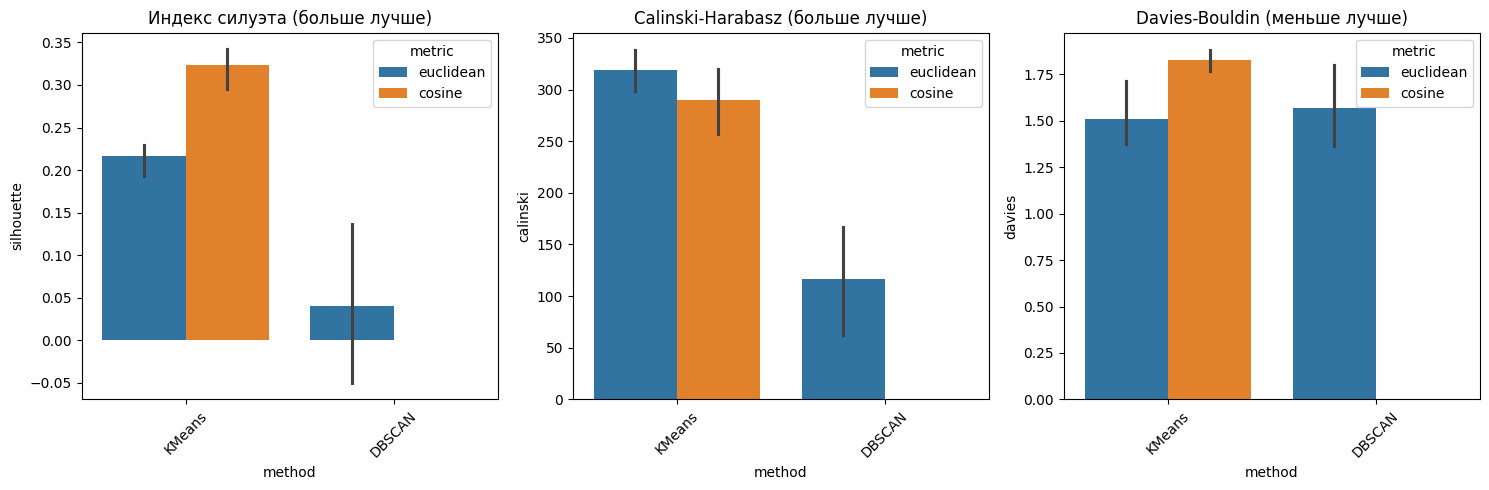

Лучший результат по силуэту:
silhouette      0.345613
calinski       278.73413
davies          1.806061
n_clusters             5
method            KMeans
metric            cosine
eps                  NaN
min_samples          NaN
Name: 5, dtype: object

Лучший результат по Calinski-Harabasz:
silhouette       0.222166
calinski       344.925224
davies           1.469451
n_clusters              4
method             KMeans
metric          euclidean
eps                   NaN
min_samples           NaN
Name: 2, dtype: object

Лучший результат по Davies-Bouldin:
silhouette     -0.044595
calinski       52.959865
davies          1.124033
n_clusters             7
method            DBSCAN
metric         euclidean
eps                  1.0
min_samples         15.0
Name: 20, dtype: object


In [71]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Подготовка данных
X = actor_features[numeric_cols_actor]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Функция для оценки кластеризации
def evaluate_clustering(X, labels, metric_name='euclidean'):
    if len(np.unique(labels)) < 2:
        return {
            'silhouette': -1,
            'calinski': -1,
            'davies': float('inf'),
            'n_clusters': len(np.unique(labels))
        }
    
    return {
        'silhouette': silhouette_score(X, labels, metric=metric_name),
        'calinski': calinski_harabasz_score(X, labels),
        'davies': davies_bouldin_score(X, labels),
        'n_clusters': len(np.unique(labels))
    }

# 3. Тестирование KMeans (4-6 кластеров)
kmeans_results = []
for n_clusters in range(3, 7):
    # Евклидова метрика
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    res = evaluate_clustering(X_scaled, labels)
    res.update({'method': 'KMeans', 'metric': 'euclidean', 'n_clusters': n_clusters})
    kmeans_results.append(res)
    
    # Косинусная метрика
    cos_dist = cosine_distances(X_scaled)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(cos_dist)
    res = evaluate_clustering(X_scaled, labels, 'cosine')
    res.update({'method': 'KMeans', 'metric': 'cosine', 'n_clusters': n_clusters})
    kmeans_results.append(res)

# 4. Тестирование DBSCAN
dbscan_results = []
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 25]

for eps in eps_values:
    for min_samples in min_samples_values:
        # Евклидова метрика
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(X_scaled)
        res = evaluate_clustering(X_scaled, labels)
        res.update({'method': 'DBSCAN', 'metric': 'euclidean', 'eps': eps, 'min_samples': min_samples})
        dbscan_results.append(res)
        
        # Косинусная метрика
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = dbscan.fit_predict(X_scaled)
        res = evaluate_clustering(X_scaled, labels, 'cosine')
        res.update({'method': 'DBSCAN', 'metric': 'cosine', 'eps': eps, 'min_samples': min_samples})
        dbscan_results.append(res)

# 5. Сбор и анализ результатов
results_df = pd.DataFrame(kmeans_results + dbscan_results)

print("Результаты:")
print(results_df)
# Фильтрация результатов по количеству кластеров (4-6)
valid_results = results_df[results_df['n_clusters'].between(3, 7)]

# Визуализация
plt.figure(figsize=(15, 5))
metrics = ['silhouette', 'calinski', 'davies']
titles = ['Индекс силуэта (больше лучше)', 'Calinski-Harabasz (больше лучше)', 'Davies-Bouldin (меньше лучше)']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='method', y=metric, hue='metric', data=valid_results)
    plt.title(titles[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# 6. Выбор лучшей конфигурации
best_by_silhouette = valid_results.loc[valid_results['silhouette'].idxmax()]
print("Лучший результат по силуэту:")
print(best_by_silhouette)

best_by_calinski = valid_results.loc[valid_results['calinski'].idxmax()]
print("\nЛучший результат по Calinski-Harabasz:")
print(best_by_calinski)

best_by_davies = valid_results.loc[valid_results['davies'].idxmin()]
print("\nЛучший результат по Davies-Bouldin:")
print(best_by_davies)

In [58]:
kmeans = KMeans(n_clusters=3, random_state=38)
labels = kmeans.fit_predict(X_scaled)
actor_features['cluster'] = labels

In [72]:
cos_dist = cosine_distances(X_scaled)
kmeans = KMeans(n_clusters=5, random_state=38)
labels = kmeans.fit_predict(X_scaled)
actor_features['cluster'] = labels

In [76]:
# Примеры актеров из каждого кластера
for cl in actor_features['cluster'].unique():
    print(f"\nCluster {cl}:")
    print(actor_features[actor_features['cluster'] == cl].describe())
    print(actor_features[actor_features['cluster'] == cl].sort_values('lead_budget_mean', ascending=False)['actor_name'].head(3))


Cluster 2:
       lead_budget_mean  lead_revenue_mean  lead_popularity_mean  \
count      6.590000e+02       6.590000e+02            659.000000   
mean       3.971226e+07       1.060749e+08             11.957383   
std        3.233401e+07       1.220295e+08             13.470807   
min        1.000000e+00       8.000000e+00              1.500013   
25%        1.695976e+07       3.295922e+07              7.817030   
50%        3.200000e+07       6.791866e+07              9.898925   
75%        5.366964e+07       1.242311e+08             12.331249   
max        2.600000e+08       8.754579e+08            213.849907   

       lead_vote_average_mean  lead_order_count  lead_profitable_movies  \
count              659.000000        659.000000              659.000000   
mean                 6.098537          2.980273                1.138088   
std                  0.624129          2.081451                1.169804   
min                  3.450000          1.000000                0.000000   


### Проверка кластеризации

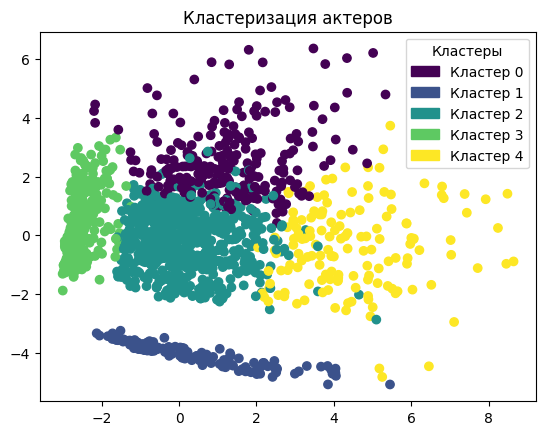

In [79]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Рисуем scatter plot
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=actor_features['cluster'], cmap='viridis')
plt.title('Кластеризация актеров')

# Получаем уникальные кластеры
clusters = np.unique(actor_features['cluster'])

# Создаём легенду вручную
handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(cluster)), label=f'Кластер {cluster}')
    for cluster in clusters
]

plt.legend(handles=handles, title='Кластеры')
plt.show()

In [61]:
for cl in actor_features['cluster'].unique():
    actor_features[actor_features['cluster'] == cl].describe().to_csv(f"cl_{cl}.csv")

actor_features'cluster' = actor_features'cluster'.map({
    0: 'A',
    1: 'A',
    2: 'C'
})

In [80]:
actor_features['cluster'] = actor_features['cluster'].map({
    4: 'A',
    2: 'B',
    0: 'B',
    1: 'C',
    3: 'C',
})

actor_features.columns

Index(['actor_name', 'lead_budget_mean', 'lead_revenue_mean',
       'lead_popularity_mean', 'lead_vote_average_mean', 'lead_order_count',
       'lead_profitable_movies', 'lead_unprofitable_movies',
       'support_budget_mean', 'support_revenue_mean',
       'support_popularity_mean', 'support_vote_average_mean',
       'support_order_count', 'support_profitable_movies',
       'support_unprofitable_movies', 'total_movies', 'pct_lead_roles',
       'pct_support_roles', 'lead_success_ratio', 'support_success_ratio',
       'cluster'],
      dtype='object')

### Добавление категории актера

In [81]:
actor_category = actor_features[['actor_name', 'cluster']]
df_full_actor = df_full_actor.merge(actor_category, 
                                    on='actor_name',
                                    how='left')
df_full_actor['cluster'].isna().sum()

np.int64(52884)

In [82]:
df_full_actor.columns

Index(['movie_id', 'actor_id', 'actor_name', 'character', 'order', 'budget',
       'genres', 'original_language', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'release_year', 'release_week', 'profit', 'cluster'],
      dtype='object')

In [83]:
df_full_actor['cluster'].value_counts()

cluster
B    10063
C     4780
A     3175
Name: count, dtype: int64

In [ ]:
df_full_actor[['actor_name', 'movie_id']].value_counts().head(10)

actor_name           movie_id
Jesse Bradford       15028       4
George Clooney       4912        4
Andy Quesnel         4912        4
Dino Tosques         4912        4
Jesse Camp           17130       4
Anna Silk            4912        4
Lindze Letherman     15028       4
Jaye P. Morgan       4912        4
Ilona Elkin          4912        4
French Stewart       15028       4
Steve Adams          4912        4
Garikayi Mutambirwa  15028       4
Tony Abatemarco      15028       4
Jerry Weintraub      4912        4
Dick Clark           4912        4
Drew Barrymore       4912        4
Brian J. Williams    15028       4
David Julian Hirsh   4912        4
Robin Thomas         15028       4
Brad Pitt            4912        4
Name: count, dtype: int64

In [181]:
pair_counts = df_full_actor[['actor_name', 'movie_id']].value_counts()

# Фильтруем только те пары, у которых меньше 4 появлений
rare_pairs = pair_counts[pair_counts >= 4].index

# Фильтруем основной DataFrame
filtered_df = df_full_actor.set_index(['actor_name', 'movie_id']).loc[rare_pairs].reset_index()

filtered_df.head(10)

,actor_name,movie_id,actor_id,character,order,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year,release_week,profit,cluster
0,Jesse Bradford,15028,17772,Zak Gibbs,0,26000000,"[Adventure, Family, Science Fiction, Thriller]",en,5.373623,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-03-17,38793283,94.0,Clockstoppers,4.9,89,2002,11,12793283,C
1,Jesse Bradford,15028,17772,Zak Gibbs,0,26000000,"[Adventure, Family, Science Fiction, Thriller]",en,4.920175,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-03-17,38793283,94.0,Clockstoppers,4.9,90,2002,11,12793283,C
2,Jesse Bradford,15028,17772,Zak Gibbs,0,26000000,"[Adventure, Family, Science Fiction, Thriller]",en,5.373623,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-03-17,38793283,94.0,Clockstoppers,4.9,89,2002,11,12793283,C
3,Jesse Bradford,15028,17772,Zak Gibbs,0,26000000,"[Adventure, Family, Science Fiction, Thriller]",en,4.920175,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-03-17,38793283,94.0,Clockstoppers,4.9,90,2002,11,12793283,C
4,George Clooney,4912,1461,CIA Agent Jim Byrd,6,30000000,"[Comedy, Crime, Drama, Romance, Thriller]",en,11.331072,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805,113.0,Confessions of a Dangerous Mind,6.6,281,2002,1,3013805,A
5,George Clooney,4912,1461,CIA Agent Jim Byrd,6,30000000,"[Comedy, Crime, Drama, Romance, Thriller]",en,7.645827,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805,113.0,Confessions of a Dangerous Mind,6.6,281,2002,1,3013805,A
6,George Clooney,4912,1461,CIA Agent Jim Byrd,6,30000000,"[Comedy, Crime, Drama, Romance, Thriller]",en,11.331072,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805,113.0,Confessions of a Dangerous Mind,6.6,281,2002,1,3013805,A
7,George Clooney,4912,1461,CIA Agent Jim Byrd,6,30000000,"[Comedy, Crime, Drama, Romance, Thriller]",en,7.645827,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805,113.0,Confessions of a Dangerous Mind,6.6,281,2002,1,3013805,A
8,Andy Quesnel,4912,1560626,Gong Show Model,16,30000000,"[Comedy, Crime, Drama, Romance, Thriller]",en,11.331072,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805,113.0,Confessions of a Dangerous Mind,6.6,281,2002,1,3013805,NaN
9,Andy Quesnel,4912,1560626,Gong Show Model,16,30000000,"[Comedy, Crime, Drama, Romance, Thriller]",en,7.645827,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805,113.0,Confessions of a Dangerous Mind,6.6,281,2002,1,3013805,NaN


In [178]:
df_movies[df_movies['id'] == 15028]['title']

247     Clockstoppers
2366    Clockstoppers
Name: title, dtype: object

In [84]:
results_df = df_full_actor.groupby('movie_id').apply(
    lambda x: {
        'A_first': ((x['cluster'] == 'A') & (x['order'] < 3)).sum(),
        'B_first': ((x['cluster'] == 'B') & (x['order'] < 3)).sum(),
        'A_second': ((x['cluster'] == 'A') & (x['order'] > 2) & (x['order'] <= 5)).sum(),
        'B_second': ((x['cluster'] == 'B') & (x['order'] > 2) & (x['order'] <= 5)).sum(),
    }
).apply(pd.Series)

C:\Users\user\AppData\Local\Temp\ipykernel_19168\376119058.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results_df = df_full_actor.groupby('movie_id').apply(


In [85]:
results_df.head(15)

,A_first,B_first,A_second,B_second
movie_id,,,,
12,0,1,0,2
16,0,1,0,1
22,1,2,1,0
24,0,2,0,0
25,2,0,0,3
35,0,0,0,1
38,3,0,1,2
58,2,1,0,2
59,0,2,1,1


In [86]:
df_movies = df_movies.merge(
    results_df,
    left_on='id',
    right_on='movie_id',
    how='left'
)
df_movies.head()

,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year,release_week,profit,A_first,B_first,A_second,B_second
0,11000000,[Comedy],10471,en,10.065450,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,98.0,Next Friday,6.5,145,2000,2,48827328,1.0,1.0,0.0,2.0
1,90000000,"[Horror, Science Fiction, Thriller]",10384,en,5.496624,"[{'iso_3166_1': 'CH', 'name': 'Switzerland'}, ...",2000-01-14,14828081,91.0,Supernova,4.9,109,2000,2,-75171919,0.0,3.0,0.0,1.0
2,40000000,"[Horror, Mystery]",4234,en,9.738371,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-03,161834276,116.0,Scream 3,5.7,749,2000,5,121834276,0.0,2.0,0.0,1.0
3,10000000,"[Action, Comedy, Romance, Thriller]",29076,en,6.370105,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-04,1631839,101.0,Gun Shy,5.4,24,2000,5,-8368161,2.0,1.0,0.0,0.0
4,40000000,"[Drama, Adventure, Romance, Thriller]",1907,en,14.430311,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-02-11,144056873,119.0,The Beach,6.3,1271,2000,6,104056873,0.0,1.0,0.0,0.0


## Задача регрессии

In [87]:
df_movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'popularity',
       'production_countries', 'release_date', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'release_year', 'release_week', 'profit',
       'A_first', 'B_first', 'A_second', 'B_second'],
      dtype='object')

### Первичный анализ данных

In [115]:
df_movies.isna().sum()

budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
release_year            0
release_week            0
profit                  0
A_first                 2
B_first                 2
A_second                2
B_second                2
is_summer               0
is_Xmas                 0
years_since_release     0
is_Comedy               0
is_Thriller             0
is_Drama                0
genre_profit_class      0
is_high_genre_profit    0
is_low_genre_profit     0
dtype: int64

In [127]:
numeric_columns = ['revenue', 'budget', 'profit', 'runtime', 'vote_average', 'vote_count', 'release_year', 'release_week', 'A_first', 'B_first', 'A_second', 'B_second']
boolean_columns = ['is_Drama', 'is_Comedy', 'is_Thriller', 'is_high_genre_profit', 'is_low_genre_profit']

In [116]:
df_movies[df_movies['A_first'].isna()][['title', 'A_first', 'B_first', 'A_second', 'B_second']].head(10)

,title,A_first,B_first,A_second,B_second
324,Naqoyqatsi,NaN,NaN,NaN,NaN
560,Yu-Gi-Oh! The Movie,NaN,NaN,NaN,NaN


In [117]:
df_movies = df_movies.dropna(subset=['title', 'A_first', 'B_first', 'A_second', 'B_second'])

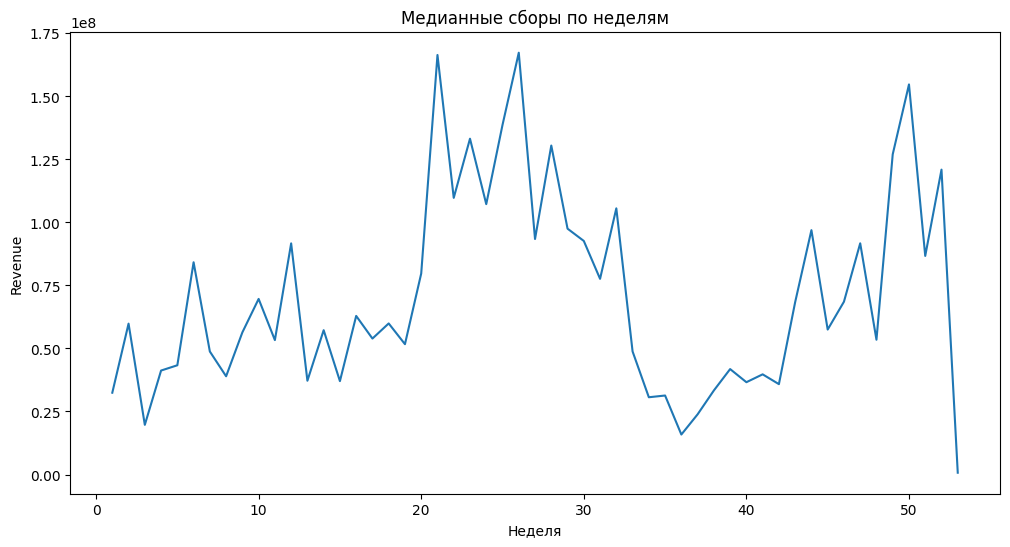

release_week
26    167221571.0
21    166324466.0
50    154648887.0
25    138598848.0
23    133134373.5
28    130431368.0
49    126947000.5
52    120873621.5
22    109682142.0
24    107196498.0
Name: revenue, dtype: float64


In [88]:
plt.figure(figsize=(12, 6))
df_movies.groupby('release_week')['revenue'].median().plot()
plt.title('Медианные сборы по неделям')
plt.xlabel('Неделя')
plt.ylabel('Revenue')
plt.show()

print(df_movies.groupby('release_week')['revenue'].median().nlargest(10))

In [128]:
df_movies['is_summer'] = df_movies['release_week'].between(25, 30).astype(int)
df_movies['is_Xmas'] = df_movies['release_week'].between(47, 53).astype(int)

boolean_columns.extend(['is_summer', 'is_Xmas'])

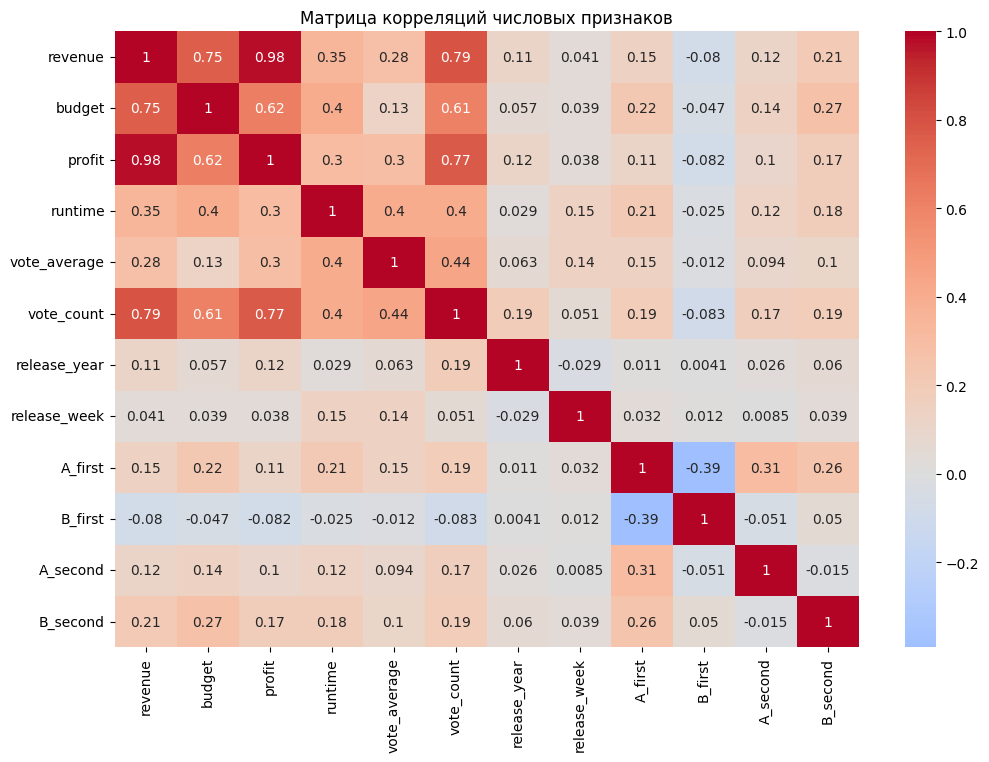

In [120]:
corr_matrix = df_movies[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков')
plt.show()

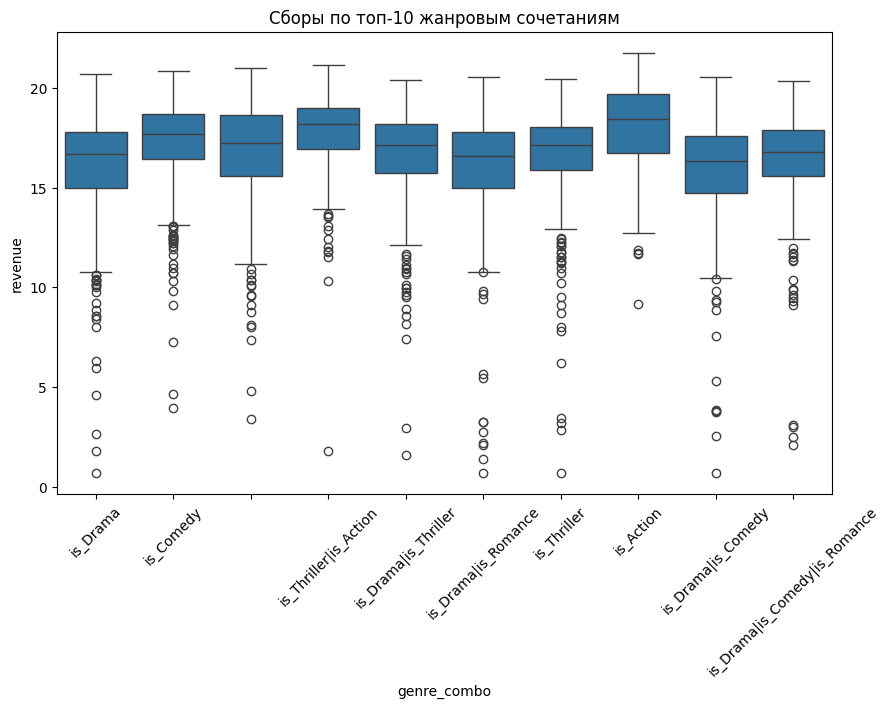

In [74]:
genre_cols = ['is_Drama', 'is_Comedy', 'is_Thriller', 'is_Romance', 'is_Action']
genre_combinations = df_movies[genre_cols].apply(lambda x: '|'.join(x.index[x==1]), axis=1)
df_movies['genre_combo'] = genre_combinations

top_combos = genre_combinations.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=df_movies[df_movies['genre_combo'].isin(top_combos.index)]['genre_combo'], 
    y=np.log1p(df_movies['revenue']),
    order=top_combos.index
)
plt.xticks(rotation=45)
plt.title('Сборы по топ-10 жанровым сочетаниям')
plt.show()

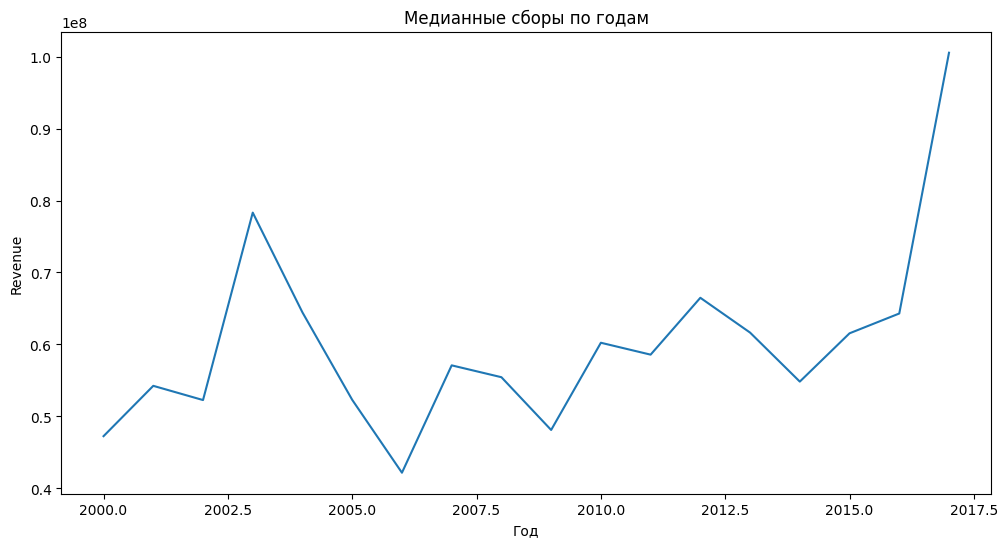

In [93]:
plt.figure(figsize=(12, 6))
df_movies.groupby('release_year')['revenue'].median().plot()
plt.title('Медианные сборы по годам')
plt.xlabel('Год')
plt.ylabel('Revenue')
plt.show()

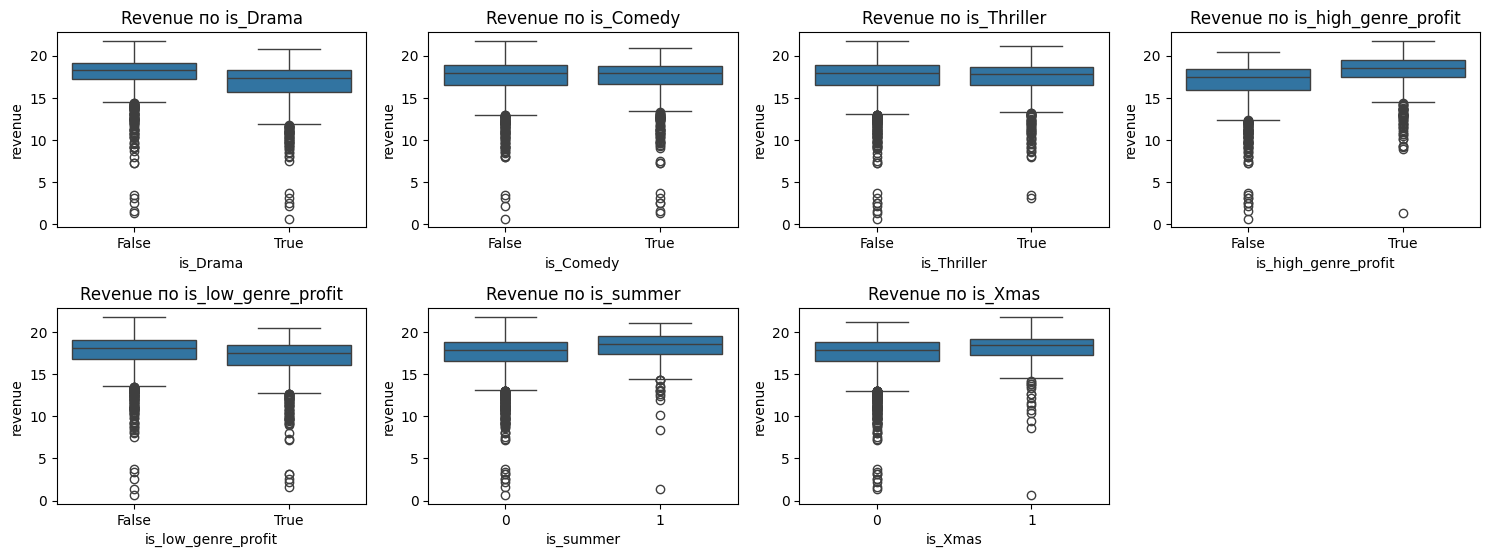

is_Drama: p-value = 1.0000 
is_Comedy: p-value = 0.6688 
is_Thriller: p-value = 0.9866 
is_high_genre_profit: p-value = 0.0000 ***
is_low_genre_profit: p-value = 1.0000 
is_summer: p-value = 0.0000 ***
is_Xmas: p-value = 0.0000 ***


In [125]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(boolean_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=col, y=np.log1p(df_movies['revenue']), data=df_movies)
    plt.title(f'Revenue по {col}')
plt.tight_layout()
plt.show()

# Статистический тест
from scipy.stats import mannwhitneyu

for col in boolean_columns:
    group1 = df_movies[df_movies[col] == 1]['revenue']
    group0 = df_movies[df_movies[col] == 0]['revenue']
    _, p = mannwhitneyu(group1, group0, alternative='greater')
    print(f"{col}: p-value = {p:.4f} {'***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''}")

In [129]:
import datetime as dt
df_movies['years_since_release'] = 2017 - df_movies['release_year']

In [95]:
numeric_columns.remove('release_year')
numeric_columns.remove('release_week')

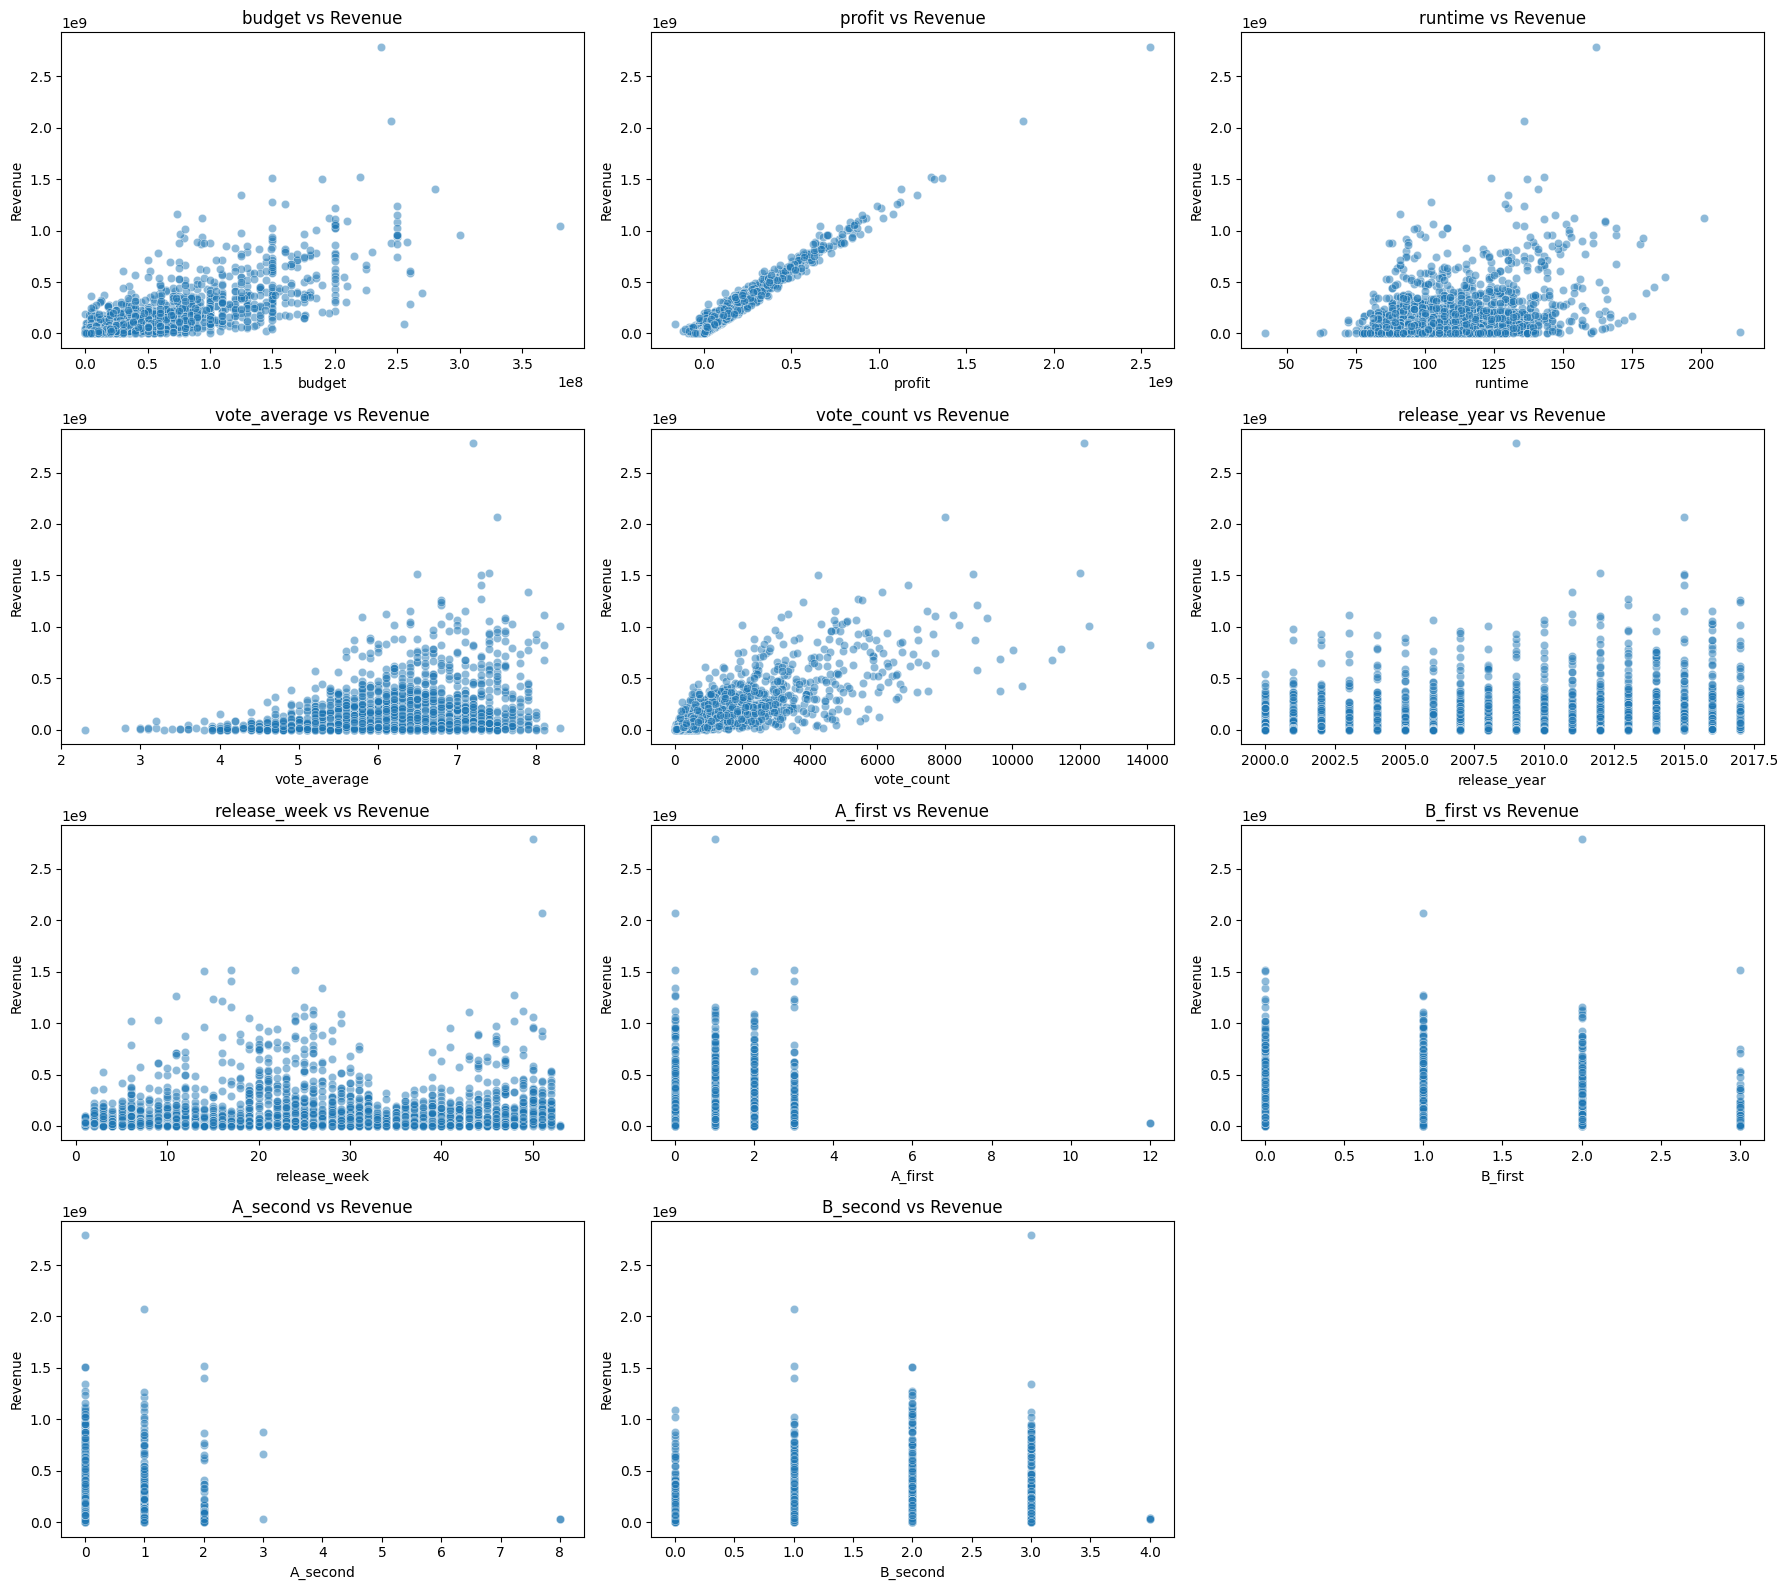

In [158]:
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate([c for c in numeric_columns if c != 'revenue']):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df_movies[col], y=df_movies['revenue'], alpha=0.5)
    plt.title(f'{col} vs Revenue')
    plt.xlabel(col)
    plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

In [159]:
df_movies[df_movies['A_first'] == 12][['title', 'A_first', 'B_first', 'A_second', 'B_second']].head(10)

,title,A_first,B_first,A_second,B_second
357,Confessions of a Dangerous Mind,12.0,0.0,8.0,4.0
2367,Confessions of a Dangerous Mind,12.0,0.0,8.0,4.0


In [161]:
df_movies[df_movies['A_second'] == 8][['id', 'title', 'A_first', 'B_first', 'A_second', 'B_second']].head(10)

,id,title,A_first,B_first,A_second,B_second
357,4912,Confessions of a Dangerous Mind,12.0,0.0,8.0,4.0
2367,4912,Confessions of a Dangerous Mind,12.0,0.0,8.0,4.0


In [173]:
cast = df_cast[df_cast['id'] == 4912]['cast']
print(cast)
cast = ast.literal_eval(cast.iloc[0]) if isinstance(cast.iloc[0], str) else cast.iloc[0]
print(cast)

5865     [{'cast_id': 15, 'character': 'Chuck Barris', ...
33838    [{'cast_id': 15, 'character': 'Chuck Barris', ...
Name: cast, dtype: object
[{'cast_id': 15, 'character': 'Chuck Barris', 'credit_id': '52fe43e2c3a36847f80760fb', 'gender': 2, 'id': 6807, 'name': 'Sam Rockwell', 'order': 0, 'profile_path': '/p7uSFwKeVw7BIPzGVlI89Md5hl4.jpg'}, {'cast_id': 16, 'character': 'Penny', 'credit_id': '52fe43e2c3a36847f80760ff', 'gender': 1, 'id': 69597, 'name': 'Drew Barrymore', 'order': 1, 'profile_path': '/y8GKPHsBXVGIGBdDzdNxjm0IbKF.jpg'}, {'cast_id': 17, 'character': 'Patricia Watson', 'credit_id': '52fe43e2c3a36847f8076103', 'gender': 1, 'id': 1204, 'name': 'Julia Roberts', 'order': 2, 'profile_path': '/h13yvG0tRNMTAwciQXxYmQWdYW8.jpg'}, {'cast_id': 18, 'character': 'Keeler', 'credit_id': '52fe43e2c3a36847f8076107', 'gender': 2, 'id': 585, 'name': 'Rutger Hauer', 'order': 3, 'profile_path': '/2x1S2VAUvZXZuDjZ4E9iEKINvNu.jpg'}, {'cast_id': 20, 'character': 'Brad, 1st Bachelor', 'credit_id'

### Построенние моделей

In [96]:
numeric_columns

['revenue',
 'budget',
 'runtime',
 'vote_average',
 'vote_count',
 'A_first',
 'B_first',
 'A_second',
 'B_second']

In [130]:
boolean_columns

['is_Drama',
 'is_Comedy',
 'is_Thriller',
 'is_high_genre_profit',
 'is_low_genre_profit',
 'is_summer',
 'is_Xmas']

In [134]:
X_columns = numeric_columns + boolean_columns + ['years_since_release']
for col in ['revenue', 'profit', 'release_week', 'release_year']:
    if col in X_columns:
        X_columns.remove(col)

In [135]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [136]:
X = df_movies[X_columns]
y = df_movies['revenue']

In [137]:
df_movies[X_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2579 entries, 0 to 2604
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                2579 non-null   int64  
 1   runtime               2579 non-null   float64
 2   vote_average          2579 non-null   float64
 3   vote_count            2579 non-null   int64  
 4   A_first               2579 non-null   float64
 5   B_first               2579 non-null   float64
 6   A_second              2579 non-null   float64
 7   B_second              2579 non-null   float64
 8   is_Drama              2579 non-null   bool   
 9   is_Comedy             2579 non-null   bool   
 10  is_Thriller           2579 non-null   bool   
 11  is_high_genre_profit  2579 non-null   bool   
 12  is_low_genre_profit   2579 non-null   bool   
 13  is_summer             2579 non-null   int64  
 14  is_Xmas               2579 non-null   int64  
 15  years_since_release   2579

In [142]:
df_movies = df_movies.fillna(0)

bool_columns = ['is_Drama', 'is_Comedy', 'is_Thriller', 'is_high_genre_profit', 'is_low_genre_profit']
df_movies[bool_columns] = df_movies[bool_columns].astype(int)


In [138]:
df_movies.isna().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
is_en_language          0
is_Drama                0
is_Comedy               0
is_Thriller             0
is_Romance              0
is_Action               0
us_supported            0
release_year            0
release_week            0
A_first                 0
B_first                 0
A_second                0
B_second                0
is_summer               0
is_Xmas                 0
genre_combo             0
years_since_release     0
dtype: int64

In [98]:
df_movies['revenue'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5358 entries, 0 to 5357
Series name: revenue
Non-Null Count  Dtype
--------------  -----
5358 non-null   Int64
dtypes: Int64(1)
memory usage: 47.2 KB


In [138]:
def adversarial_validation(X_train, X_test, n_folds=5, random_state=42):
    """
    Функция для проведения adversarial validation между тренировочным и тестовым набором данных.

    Параметры:
    X_train - тренировочный набор данных (pandas DataFrame или Series)
    X_test - тестовый набор данных (pandas DataFrame или Series)
    n_folds - количество фолдов для кросс-валидации
    random_state - фиксированное значение для воспроизводимости результатов

    Возвращает:
    mean_auc - среднее значение ROC AUC
    feature_importance - важность признаков
    """

    # Проверяем типы входных данных и преобразуем Series в DataFrame при необходимости
    if isinstance(X_train, pd.Series):
        X_train = X_train.to_frame()

    if isinstance(X_test, pd.Series):
        X_test = X_test.to_frame()

    # Проверяем, что входные данные являются pandas DataFrame
    if not isinstance(X_train, pd.DataFrame) or not isinstance(X_test, pd.DataFrame):
        raise TypeError("X_train и X_test должны быть pandas DataFrame или Series")

    # Проверяем, что все колонки имеют имена
    if any(not isinstance(col, str) for col in X_train.columns) or any(not isinstance(col, str) for col in X_test.columns):
        raise ValueError("Все колонки в X_train и X_test должны иметь строковые имена")

    # Проверяем, что наборы данных имеют одинаковые колонки
    if set(X_train.columns) != set(X_test.columns):
        raise ValueError("Колонки в тренировочном и тестовом наборах должны совпадать")

    # Создаем новый целевой признак: 0 для тренировочных данных, 1 для тестовых
    X_train_labeled = X_train.copy()
    X_test_labeled = X_test.copy()

    X_train_labeled['is_test'] = 0
    X_test_labeled['is_test'] = 1

    # Объединяем данные в один датасет
    combined_data = pd.concat([X_train_labeled, X_test_labeled], axis=0)

    # Перемешиваем данные
    combined_data = combined_data.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # Выделяем признаки и целевую переменную
    X = combined_data.drop('is_test', axis=1)
    y = combined_data['is_test']

    # Проверяем, что все колонки в X содержат числовые данные
    non_numeric_cols = [col for col in X.columns if not np.issubdtype(X[col].dtype, np.number)]
    if non_numeric_cols:
        raise ValueError(f"Следующие колонки содержат нечисловые данные: {non_numeric_cols}. "
                         f"Преобразуйте их в числовой формат перед использованием.")

    # Инициализируем модель XGBoost
    model = XGBClassifier(
        max_depth=3,
        learning_rate=0.1,
        n_estimators=100,
        objective='binary:logistic',
        random_state=random_state
    )

    # Инициализируем кросс-валидацию
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state)

    # Списки для хранения результатов
    auc_scores = []
    y_true_all = []
    y_pred_all = []

    # Проводим кросс-валидацию
    for i, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

        # Обучаем модель
        model.fit(X_fold_train, y_fold_train)

        # Получаем предсказания вероятностей
        y_pred = model.predict_proba(X_fold_val)[:, 1]

        # Вычисляем ROC AUC
        auc = roc_auc_score(y_fold_val, y_pred)
        auc_scores.append(auc)

        # Сохраняем результаты для построения общей ROC-кривой
        y_true_all.extend(y_fold_val)
        y_pred_all.extend(y_pred)

        print(f"Фолд {i+1}: ROC AUC = {auc:.4f}")

    # Вычисляем среднее значение ROC AUC
    mean_auc = np.mean(auc_scores)
    print(f"\nСреднее значение ROC AUC: {mean_auc:.4f}")

    # Обучаем модель на всех данных для получения важности признаков
    final_model = XGBClassifier(
        max_depth=3,
        learning_rate=0.1,
        n_estimators=100,
        objective='binary:logistic',
        random_state=random_state
    )
    final_model.fit(X, y)

    # Получаем важность признаков
    feature_importance = pd.DataFrame({
        'Признак': X.columns,
        'Важность': final_model.feature_importances_
    }).sort_values('Важность', ascending=False)

    # Строим ROC-кривую
    fpr, tpr, _ = roc_curve(y_true_all, y_pred_all)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {mean_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Случайное угадывание')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая для Adversarial Validation')
    plt.legend()
    plt.grid(True)

    # Выводим топ-10 важных признаков
    plt.figure(figsize=(12, 6))
    top_features = feature_importance.head(min(10, len(feature_importance)))
    plt.barh(top_features['Признак'], top_features['Важность'])
    plt.xlabel('Важность')
    plt.ylabel('Признак')
    plt.title('Топ-10 признаков по важности')
    plt.gca().invert_yaxis()  # Инвертируем ось Y для отображения самых важных признаков сверху

    return mean_auc, feature_importance

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    df_movies[X_columns],
    np.log1p(df_movies['revenue']),
    test_size=0.25,
    random_state=42,
)

X_train['budget'] = np.log1p(X_train['budget'])
X_test['budget'] = np.log1p(X_test['budget'])

Фолд 1: ROC AUC = 0.4906
Фолд 2: ROC AUC = 0.4828
Фолд 3: ROC AUC = 0.4750
Фолд 4: ROC AUC = 0.5021
Фолд 5: ROC AUC = 0.4481

Среднее значение ROC AUC: 0.4797


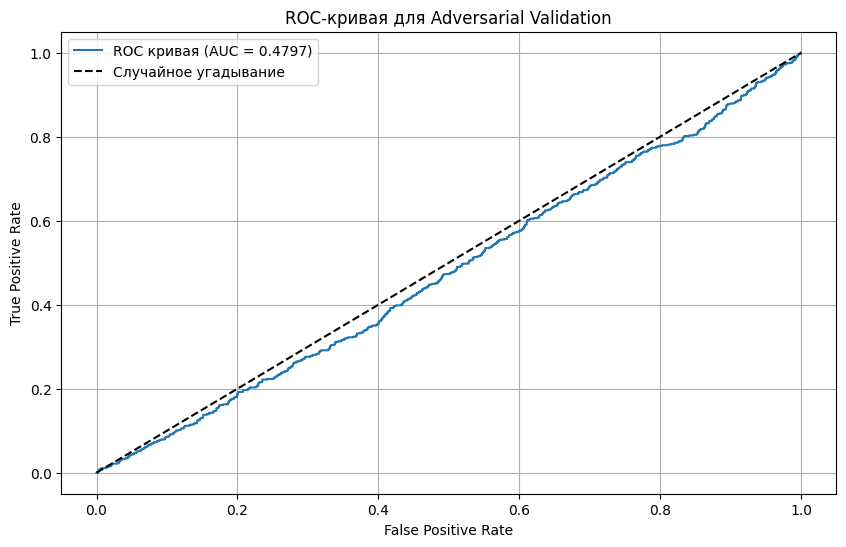

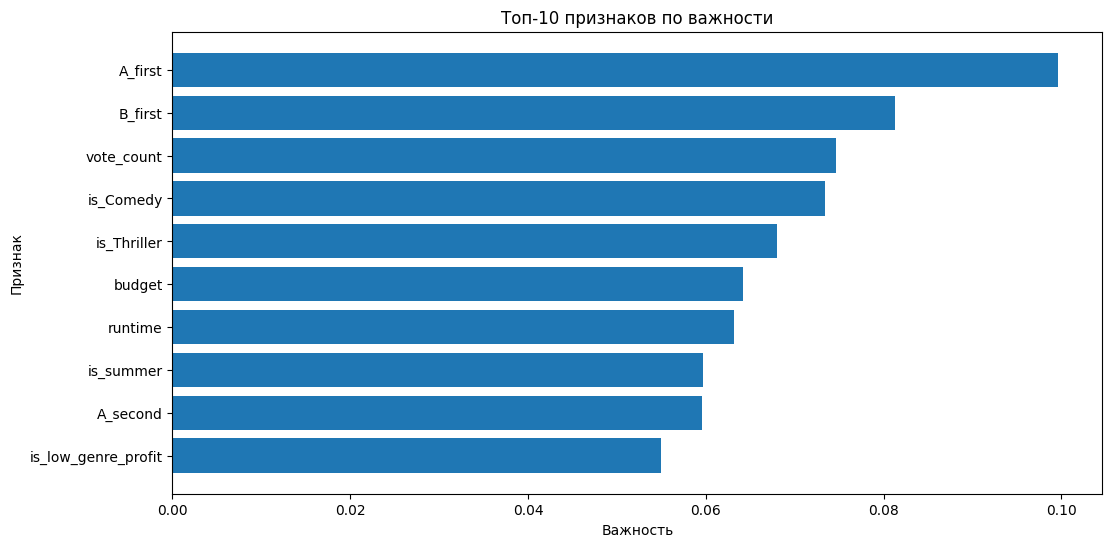

In [154]:
mean_auc, feature_importance = adversarial_validation(X_train, X_test)

In [145]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
import xgboost as xgb

In [146]:
def visualize_residuals(y_true, y_pred, dataset_name=""):
    """
    Функция для визуализации остатков регрессионной модели

    Параметры:
    y_true - истинные значения целевой переменной
    y_pred - предсказанные значения
    dataset_name - название набора данных для заголовков графиков
    """
    # Вычисляем остатки
    residuals = y_true - y_pred

    # Создаем фигуру с подграфиками
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Анализ остатков ({dataset_name})', fontsize=16)

    # 1. График остатков относительно предсказанных значений
    axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='-')
    axes[0, 0].set_title('Остатки vs Предсказанные значения')
    axes[0, 0].set_xlabel('Предсказанные значения')
    axes[0, 0].set_ylabel('Остатки')
    axes[0, 0].grid(True)

    # 2. Гистограмма остатков
    axes[0, 1].hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].set_title('Гистограмма остатков')
    axes[0, 1].set_xlabel('Остатки')
    axes[0, 1].set_ylabel('Частота')
    axes[0, 1].grid(True)

    # 3. QQ-график для проверки нормальности остатков
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('QQ-график остатков')
    axes[1, 0].grid(True)

    # 4. Предсказанные vs Истинные значения
    axes[1, 1].scatter(y_true, y_pred, alpha=0.5)
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--')
    axes[1, 1].set_title('Предсказанные vs Истинные значения')
    axes[1, 1].set_xlabel('Истинные значения')
    axes[1, 1].set_ylabel('Предсказанные значения')
    axes[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Оставляем место для общего заголовка
    plt.show()

In [147]:
def cross_validation_with_residuals(
    X_train, y_train, X_test, y_test, X_oot=None, y_oot=None,
    model=None, n_folds=5, random_state=42
    ):
    """
    Функция для проведения кросс-валидации с отслеживанием MSE и визуализацией остатков

    Параметры:
    X_train - признаки обучающей выборки (pandas DataFrame)
    y_train - целевая переменная обучающей выборки (pandas Series или numpy array)
    X_test - признаки тестовой выборки (pandas DataFrame)
    y_test - целевая переменная тестовой выборки (pandas Series или numpy array)
    X_oot - признаки out-of-time выборки (pandas DataFrame), опционально
    y_oot - целевая переменная out-of-time выборки (pandas Series или numpy array), опционально
    model - модель машинного обучения (по умолчанию RandomForestRegressor)
    n_folds - количество фолдов для кросс-валидации
    random_state - фиксированное значение для воспроизводимости результатов

    Возвращает:
    cv_results - словарь с результатами кросс-валидации
    final_model - обученная модель на всех тренировочных данных
    """

    # Проверка входных данных
    if not isinstance(X_train, pd.DataFrame):
        raise TypeError("X_train должен быть pandas DataFrame")

    if not isinstance(X_test, pd.DataFrame):
        raise TypeError("X_test должен быть pandas DataFrame")

    if X_oot is not None and not isinstance(X_oot, pd.DataFrame):
        raise TypeError("X_oot должен быть pandas DataFrame")

    # Проверка, что все наборы данных имеют одинаковые колонки
    if not set(X_train.columns) == set(X_test.columns):
        raise ValueError("Колонки в X_train и X_test должны совпадать")

    if X_oot is not None and not set(X_train.columns) == set(X_oot.columns):
        raise ValueError("Колонки в X_train и X_oot должны совпадать")

    # Если модель не задана, используем RandomForestRegressor по умолчанию
    if model is None:
        model = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Инициализируем KFold для кросс-валидации
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)

    # Словарь для хранения результатов
    cv_results = {
        'train_predictions': np.zeros(len(y_train)),
        'train_actual': y_train,
        'test_predictions': None,
        'test_actual': y_test,
        'oot_predictions': None,
        'oot_actual': y_oot if y_oot is not None else None,
        'fold_mse': [],
        'train_mse': 0,
        'test_mse': 0,
        'oot_mse': 0 if y_oot is not None else None
    }

    # Массивы для хранения предсказаний и истинных значений по фолдам
    fold_train_mse = []
    fold_val_mse = []

    print("Начинаем процесс кросс-валидации...")

    # Проходим по всем фолдам
    for fold, (train_idx, val_idx) in enumerate(tqdm(kf.split(X_train), total=n_folds, desc="Фолды")):
        # Разделяем данные на обучающую и валидационную выборки
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx] if isinstance(y_train, pd.Series) else y_train[train_idx], \
                                  y_train.iloc[val_idx] if isinstance(y_train, pd.Series) else y_train[val_idx]

        # Обучаем модель
        model.fit(X_fold_train, y_fold_train)

        # Делаем предсказания на обучающей и валидационной выборках
        y_fold_train_pred = model.predict(X_fold_train)
        y_fold_val_pred = model.predict(X_fold_val)

        # Сохраняем предсказания для этого фолда
        cv_results['train_predictions'][val_idx] = y_fold_val_pred

        # Вычисляем MSE для этого фолда
        train_mse = mean_squared_error(y_fold_train, y_fold_train_pred)
        val_mse = mean_squared_error(y_fold_val, y_fold_val_pred)

        fold_train_mse.append(train_mse)
        fold_val_mse.append(val_mse)
        cv_results['fold_mse'].append(val_mse)

        print(f"Фолд {fold+1}/{n_folds}:")
        print(f"  MSE на обучающей выборке: {train_mse:.4f}")
        print(f"  MSE на валидационной выборке: {val_mse:.4f}")

    # Вычисляем средние значения MSE
    cv_results['train_mse'] = np.mean(fold_train_mse)
    cv_results['val_mse'] = np.mean(fold_val_mse)

    print(f"\nСредняя MSE на обучающей выборке: {cv_results['train_mse']:.4f}")
    print(f"Средняя MSE на валидационной выборке: {cv_results['val_mse']:.4f}")

    # Обучаем финальную модель на всех тренировочных данных
    print("\nОбучаем финальную модель на всех тренировочных данных...")
    final_model = model.fit(X_train, y_train)

    # Делаем предсказания на тестовой выборке
    cv_results['test_predictions'] = final_model.predict(X_test)

    # Вычисляем MSE на тестовой выборке
    cv_results['test_mse'] = mean_squared_error(y_test, cv_results['test_predictions'])
    print(f"MSE на тестовой выборке: {cv_results['test_mse']:.4f}")

    # Если есть OOT данные, делаем предсказания на них
    if X_oot is not None and y_oot is not None:
        cv_results['oot_predictions'] = final_model.predict(X_oot)
        cv_results['oot_mse'] = mean_squared_error(y_oot, cv_results['oot_predictions'])
        print(f"MSE на OOT выборке: {cv_results['oot_mse']:.4f}")

    # Визуализация результатов
    visualize_cv_results(cv_results, n_folds)

    # Визуализация остатков
    visualize_residuals(y_test, cv_results['test_predictions'], "Тестовая выборка")

    # Если есть OOT данные, визуализируем остатки для них
    if X_oot is not None and y_oot is not None:
        visualize_residuals(y_oot, cv_results['oot_predictions'], "OOT выборка")

    return cv_results, final_model

def visualize_cv_results(cv_results, n_folds):
    """
    Функция для визуализации результатов кросс-валидации

    Параметры:
    cv_results - словарь с результатами кросс-валидации
    n_folds - количество фолдов
    """
    # Настраиваем стиль графиков
    sns.set(style="whitegrid")

    # 1. График MSE по фолдам
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_folds+1), cv_results['fold_mse'], color='skyblue')
    plt.axhline(y=np.mean(cv_results['fold_mse']), color='r', linestyle='-',
               label=f'Среднее: {np.mean(cv_results["fold_mse"]):.4f}')
    plt.title('MSE по фолдам')
    plt.xlabel('Номер фолда')
    plt.ylabel('MSE')
    plt.xticks(range(1, n_folds+1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Сравнение предсказаний и реальных значений на тренировочных данных
    plt.figure(figsize=(10, 6))
    plt.scatter(cv_results['train_actual'], cv_results['train_predictions'], alpha=0.5)
    min_val = min(min(cv_results['train_actual']), min(cv_results['train_predictions']))
    max_val = max(max(cv_results['train_actual']), max(cv_results['train_predictions']))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.title('Предсказания vs Реальные значения (Тренировочные данные)')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказания')
    plt.grid(True)
    plt.show()

    # 3. Сравнение предсказаний и реальных значений на тестовых данных
    plt.figure(figsize=(10, 6))
    plt.scatter(cv_results['test_actual'], cv_results['test_predictions'], alpha=0.5)
    min_val = min(min(cv_results['test_actual']), min(cv_results['test_predictions']))
    max_val = max(max(cv_results['test_actual']), max(cv_results['test_predictions']))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.title('Предсказания vs Реальные значения (Тестовые данные)')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказания')
    plt.grid(True)
    plt.show()

    # 4. Если есть OOT данные, визуализируем их
    if cv_results['oot_predictions'] is not None:
        plt.figure(figsize=(10, 6))
        plt.scatter(cv_results['oot_actual'], cv_results['oot_predictions'], alpha=0.5)
        min_val = min(min(cv_results['oot_actual']), min(cv_results['oot_predictions']))
        max_val = max(max(cv_results['oot_actual']), max(cv_results['oot_predictions']))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        plt.title('Предсказания vs Реальные значения (OOT данные)')
        plt.xlabel('Реальные значения')
        plt.ylabel('Предсказания')
        plt.grid(True)
        plt.show()

    # 5. Сравнение MSE на разных наборах данных
    plt.figure(figsize=(10, 6))

    # Собираем метрики для всех наборов данных
    datasets = ['Кросс-валидация', 'Тест']
    mse_values = [cv_results['val_mse'], cv_results['test_mse']]

    if cv_results['oot_mse'] is not None:
        datasets.append('OOT')
        mse_values.append(cv_results['oot_mse'])

    plt.bar(datasets, mse_values, color='skyblue')
    plt.title('Сравнение MSE на разных наборах данных')
    plt.ylabel('MSE')
    plt.grid(True)

    # Добавляем значения MSE над столбцами
    for i, v in enumerate(mse_values):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

    plt.show()

In [148]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import warnings

def cross_validation_with_residuals_hyper(
    X_train, y_train, X_test, y_test, X_oot=None, y_oot=None,
    models_to_try='all', param_grids='default', n_folds=5, 
    random_state=42, search_method='random', n_iter=50,
    verbose=1
):
    """
    Улучшенная функция для проведения кросс-валидации с подбором гиперпараметров и модели
    
    Параметры:
    X_train - признаки обучающей выборки (pandas DataFrame)
    y_train - целевая переменная обучающей выборки (pandas Series или numpy array)
    X_test - признаки тестовой выборки (pandas DataFrame)
    y_test - целевая переменная тестовой выборки (pandas Series или numpy array)
    X_oot - признаки out-of-time выборки (pandas DataFrame), опционально
    y_oot - целевая переменная out-of-time выборки (pandas Series или numpy array), опционально
    models_to_try - какие модели тестировать ('all', 'default' или список моделей)
    param_grids - словарь с параметрами для поиска ('default' или пользовательский)
    n_folds - количество фолдов для кросс-валидации
    random_state - фиксированное значение для воспроизводимости результатов
    search_method - метод поиска гиперпараметров ('grid' или 'random')
    n_iter - количество итераций для RandomizedSearchCV
    verbose - уровень детализации (0, 1 или 2)
    
    Возвращает:
    cv_results - словарь с результатами кросс-валидации
    final_model - лучшая обученная модель на всех тренировочных данных
    best_model_name - название лучшей модели
    """
    
    # Проверка входных данных
    if not isinstance(X_train, pd.DataFrame):
        raise TypeError("X_train должен быть pandas DataFrame")
    
    if not isinstance(X_test, pd.DataFrame):
        raise TypeError("X_test должен быть pandas DataFrame")
    
    if X_oot is not None and not isinstance(X_oot, pd.DataFrame):
        raise TypeError("X_oot должен быть pandas DataFrame")
    
    # Проверка совпадения колонок
    if not set(X_train.columns) == set(X_test.columns):
        raise ValueError("Колонки в X_train и X_test должны совпадать")
    
    if X_oot is not None and not set(X_train.columns) == set(X_oot.columns):
        raise ValueError("Колонки в X_train и X_oot должны совпадать")
    
    # Определение моделей для тестирования
    if models_to_try == 'all':
        models = {
            'RandomForest': RandomForestRegressor(random_state=random_state),
            'XGBoost': XGBRegressor(random_state=random_state, verbosity=0),
            'LightGBM': LGBMRegressor(random_state=random_state),
            'Ridge': Ridge(random_state=random_state),
            'Lasso': Lasso(random_state=random_state)
        }
    elif models_to_try == 'default':
        models = {
            'RandomForest': RandomForestRegressor(random_state=random_state),
            'GradientBoosting': GradientBoostingRegressor(random_state=random_state),
            'XGBoost': XGBRegressor(random_state=random_state, verbosity=0),
        }
    elif isinstance(models_to_try, dict):
        models = models_to_try
    else:
        raise ValueError("models_to_try должен быть 'all', 'default' или словарь моделей")
    
    # Определение параметров для поиска
    if param_grids == 'default':
        param_grids = {
            'RandomForest': {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            },
            'XGBoost': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5, 6],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            },
            'LightGBM': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'num_leaves': [31, 50, 100],
                'max_depth': [-1, 5, 10]
            },
            'Ridge': {
                'alpha': [0.1, 1.0, 10.0, 100.0]
            },
            'Lasso': {
                'alpha': [0.1, 1.0, 10.0, 100.0]
            },
            'SVR': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']
            }
        }
    elif not isinstance(param_grids, dict):
        raise ValueError("param_grids должен быть 'default' или словарь параметров")
    
    # Убедимся, что для всех моделей есть параметры
    for model_name in models:
        if model_name not in param_grids:
            warnings.warn(f"Нет параметров для модели {model_name}, будут использованы параметры по умолчанию")
            param_grids[model_name] = {}
    
    # Результаты по всем моделям
    all_models_results = {}
    
    
    # Перебираем все модели
    for model_name, model in models.items():
        if verbose >= 1:
            print(f"\n{'='*50}")
            print(f"Начинаем подбор параметров для модели: {model_name}")
            print(f"{'='*50}")
        
        # Выбираем метод поиска
        if search_method == 'grid':
            search = GridSearchCV(
                estimator=model,
                param_grid=param_grids[model_name],
                cv=n_folds,
                scoring='neg_mean_squared_error',
                n_jobs=-1,
                verbose=verbose
            )
        elif search_method == 'random':
            search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grids[model_name],
                n_iter=n_iter,
                cv=n_folds,
                scoring='neg_mean_squared_error',
                random_state=random_state,
                n_jobs=-1,
                verbose=verbose
            )
        else:
            raise ValueError("search_method должен быть 'grid' или 'random'")
        
        # Выполняем поиск
        search.fit(X_train, y_train)
        
        # Сохраняем результаты
        all_models_results[model_name] = {
            'best_model': search.best_estimator_,
            'best_params': search.best_params_,
            'best_score': -search.best_score_,  # преобразуем обратно в MSE
            'cv_results': search.cv_results_
        }
        
        if verbose >= 1:
            print(f"\nЛучшие параметры для {model_name}: {search.best_params_}")
            print(f"Лучший MSE (CV): {all_models_results[model_name]['best_score']:.4f}")
    
    # Выбираем лучшую модель
    best_model_name = min(all_models_results, key=lambda x: all_models_results[x]['best_score'])
    best_model = all_models_results[best_model_name]['best_model']
    best_score = all_models_results[best_model_name]['best_score']
    
    if verbose >= 1:
        print(f"\n{'='*50}")
        print(f"Лучшая модель: {best_model_name} с MSE {best_score:.4f}")
        print(f"{'='*50}")
    
    # Обучаем лучшую модель на всех данных
    final_model = best_model.fit(X_train, y_train)
    
    # Подготовка результатов
    cv_results = {
        'all_models_results': all_models_results,
        'best_model_name': best_model_name,
        'best_model': best_model,
        'best_score': best_score,
        'train_predictions': final_model.predict(X_train),
        'train_actual': y_train,
        'test_predictions': final_model.predict(X_test),
        'test_actual': y_test,
        'train_mse': mean_squared_error(y_train, final_model.predict(X_train)),
        'test_mse': mean_squared_error(y_test, final_model.predict(X_test))
    }
    
    # Если есть OOT данные
    if X_oot is not None and y_oot is not None:
        cv_results.update({
            'oot_predictions': final_model.predict(X_oot),
            'oot_actual': y_oot,
            'oot_mse': mean_squared_error(y_oot, final_model.predict(X_oot))
        })
    
    if verbose >= 1:
        print(f"\nРезультаты на полном обучении:")
        print(f"MSE на обучающей выборке: {cv_results['train_mse']:.4f}")
        print(f"MSE на тестовой выборке: {cv_results['test_mse']:.4f}")
        if X_oot is not None and y_oot is not None:
            print(f"MSE на OOT выборке: {cv_results['oot_mse']:.4f}")
    
    # Визуализация результатов
    # visualize_cv_results(cv_results, n_folds)
    visualize_residuals(y_test, cv_results['test_predictions'], "Тестовая выборка")
    if X_oot is not None and y_oot is not None:
        visualize_residuals(y_oot, cv_results['oot_predictions'], "OOT выборка")
    
    return cv_results, final_model, best_model_name

C:\Users\user\AppData\Local\Temp\ipykernel_19168\2555810738.py:118: UserWarning: Нет параметров для модели LightGBM, будут использованы параметры по умолчанию
  warnings.warn(f"Нет параметров для модели {model_name}, будут использованы параметры по умолчанию")
C:\Users\user\AppData\Local\Temp\ipykernel_19168\2555810738.py:118: UserWarning: Нет параметров для модели Lasso, будут использованы параметры по умолчанию
  warnings.warn(f"Нет параметров для модели {model_name}, будут использованы параметры по умолчанию")



Начинаем подбор параметров для модели: RandomForest
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Лучшие параметры для RandomForest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Лучший MSE (CV): 2.0682

Начинаем подбор параметров для модели: XGBoost
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-pac


Лучшие параметры для XGBoost: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Лучший MSE (CV): 2.0740

Начинаем подбор параметров для модели: LightGBM
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 1934, number of used features: 16
[LightGBM] [Info] Start training from score 17.358239

Лучшие параметры для LightGBM: {}
Лучший MSE (CV): 2.3150

Начинаем подбор параметров для модели: Ridge
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Лучшие параметры для Ridge: {'alpha': 10.0}
Лучший MSE (CV): 2.5987

Начинаем подбор параметров для модели: Lasso
Fitting 5 folds for each of 1 candidates, totalli

c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Результаты на полном обучении:
MSE на обучающей выборке: 0.7940
MSE на тестовой выборке: 1.7432


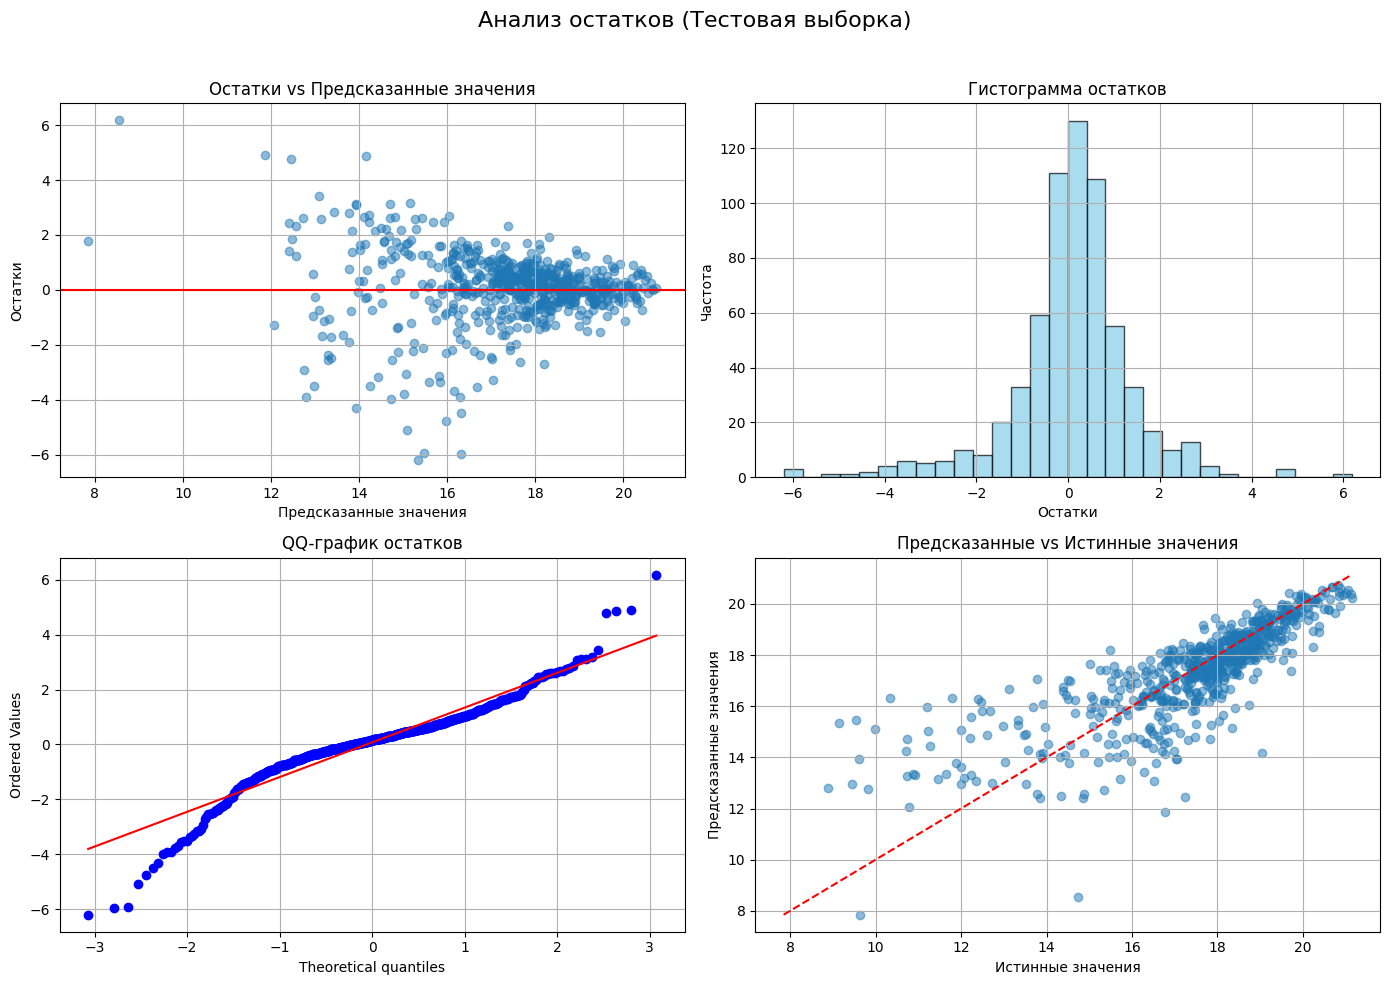

In [155]:
param_grid = {
            'RandomForest': {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            },
            'Ridge': {
                'alpha': [0.01, 0.1, 1.0, 10.0],  # Сила регуляризации (L2)
            },
            'ElasticNet': {
                'alpha': [0.01, 0.1, 1.0, 10.0],
            },
            'XGBoost': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5, 6],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            },
}

cv_results, final_model, best_model_name = cross_validation_with_residuals_hyper(X_train, y_train, X_test, y_test, param_grids=param_grid, models_to_try='all')

### Выводы по модели:
1. MSE = 1.773, это неочень хороший результать, когда мы предсказываем логарифм сборов. Модель может предсказать, что мы выручим 100 млн, а в итоге заработаем 10 млн, это будет стоит окупаемости фильма. 
2. Самые большие остатки у нас сосредоточены возле нулевых значений. Для улучшения модели возможно нужно будет разделить данные на высокобюджетные и низкобюджетные и делать для них модели.



In [152]:
print(final_model.score(X_test, y_test))

0.6225360276846348


C:\Users\user\AppData\Local\Temp\ipykernel_19168\3767738900.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')


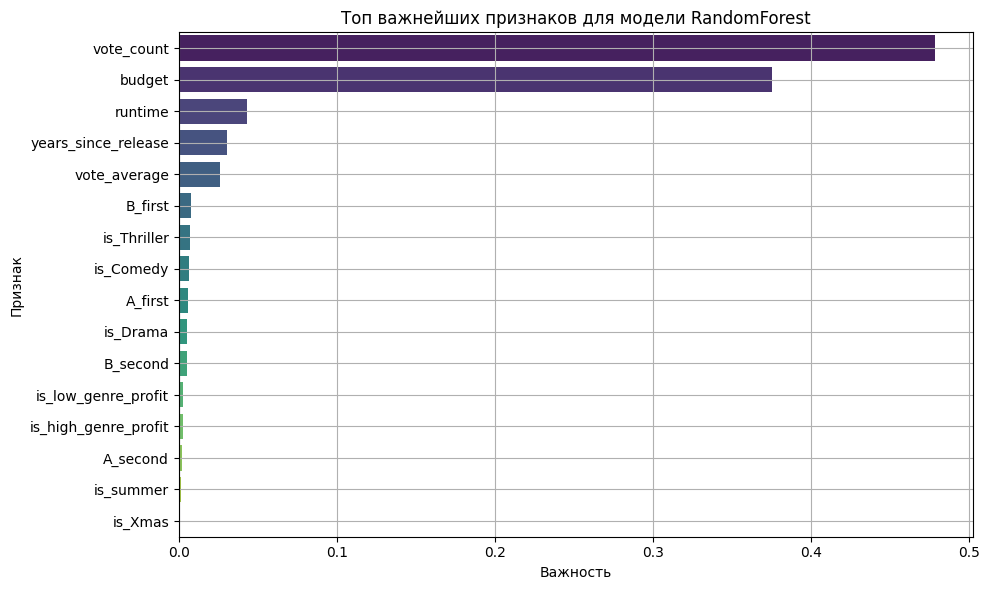

In [151]:
importances = final_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Топ важнейших признаков для модели RandomForest')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.grid(True)
plt.tight_layout()
plt.show()